<a href="https://colab.research.google.com/github/Vinod826S/Heart-Rate-Prediction-Intern/blob/main/HRV_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

def find_max_values(excel_file):
    # Read the Excel file into a dictionary of DataFrames, with sheet names as keys
    all_data = pd.read_excel(excel_file, sheet_name=None)

    # Loop through each sheet and find the maximum value in column M
    max_values = {}
    for sheet_name, df in all_data.items():
        max_value = df['H'].max()
        max_values[sheet_name] = max_value

    # Loop through the max_values dictionary and match the max values with corresponding values in column A
    result = []
    for sheet_name, max_value in max_values.items():
        df = all_data[sheet_name]
        matching_value = df.loc[df['H'] == max_value, 'Patches'].iloc[0]
        result.append((matching_value, max_value))

    return result

if __name__ == "__main__":
    excel_file_path = "/content/HRV_Data_2.xlsx"  # Replace with the actual path to your Excel file
    max_values_result = find_max_values(excel_file_path)
    count1=0
    count2=0
    count3=0
    for a_value, max_value in max_values_result:
        if(a_value=="80 - Cheek_right_top"):
          count1+=1
        elif(a_value=="77 - Cheek_right_top"):
          count2+=1
        elif(a_value=="97 - Nose"):
          count3+=1
        print(f"Matching value in column A: {a_value}, Maximum value in column M: {max_value}")
    print(count1)
    print(count2)
    print(count3)

36
5
49


In [ ]:
import pandas as pd

def find_top_5_max_values(excel_file):
    # Read the Excel file into a dictionary of DataFrames, with sheet names as keys
    all_data = pd.read_excel(excel_file, sheet_name=None)

    top_5_max_values_per_sheet = {}

    for sheet_name, df in all_data.items():
        # Find the top 5 maximum values in column H
        top_5_max_values = df.nlargest(5, 'H')

        # Get the corresponding values in column "Patches"
        matching_values = top_5_max_values['Patches'].tolist()

        top_5_max_values_per_sheet[sheet_name] = list(zip(matching_values, top_5_max_values['H']))

    return top_5_max_values_per_sheet

if __name__ == "__main__":
    excel_file_path = "/content/HRV_Data_2.xlsx"  # Replace with the actual path to your Excel file
    top_5_max_values_per_sheet = find_top_5_max_values(excel_file_path)

    for sheet_name, values in top_5_max_values_per_sheet.items():
        print(f"Top 5 maximum values in sheet '{sheet_name}':")
        for i, (a_value, max_value) in enumerate(values, 1):
            print(f"{i}. Matching value in column Patches: {a_value}, Maximum value in column H: {max_value}")

Top 5 maximum values in sheet 'Frame_1_Data':
1. Matching value in column Patches: 80 - Cheek_right_top, Maximum value in column H: 85.66155405
2. Matching value in column Patches: 77 - Cheek_right_top, Maximum value in column H: 83.1319661
3. Matching value in column Patches: 76 - Nose, Maximum value in column H: 82.59949591
4. Matching value in column Patches: 97 - Nose, Maximum value in column H: 78.83270632
5. Matching value in column Patches: 98 - Cheek_right_top, Maximum value in column H: 78.43181893
Top 5 maximum values in sheet 'Frame_2_Data':
1. Matching value in column Patches: 80 - Cheek_right_top, Maximum value in column H: 84.48098063
2. Matching value in column Patches: 77 - Cheek_right_top, Maximum value in column H: 82.82420207
3. Matching value in column Patches: 76 - Nose, Maximum value in column H: 80.8422894
4. Matching value in column Patches: 97 - Nose, Maximum value in column H: 78.78179968
5. Matching value in column Patches: 98 - Cheek_right_top, Maximum value

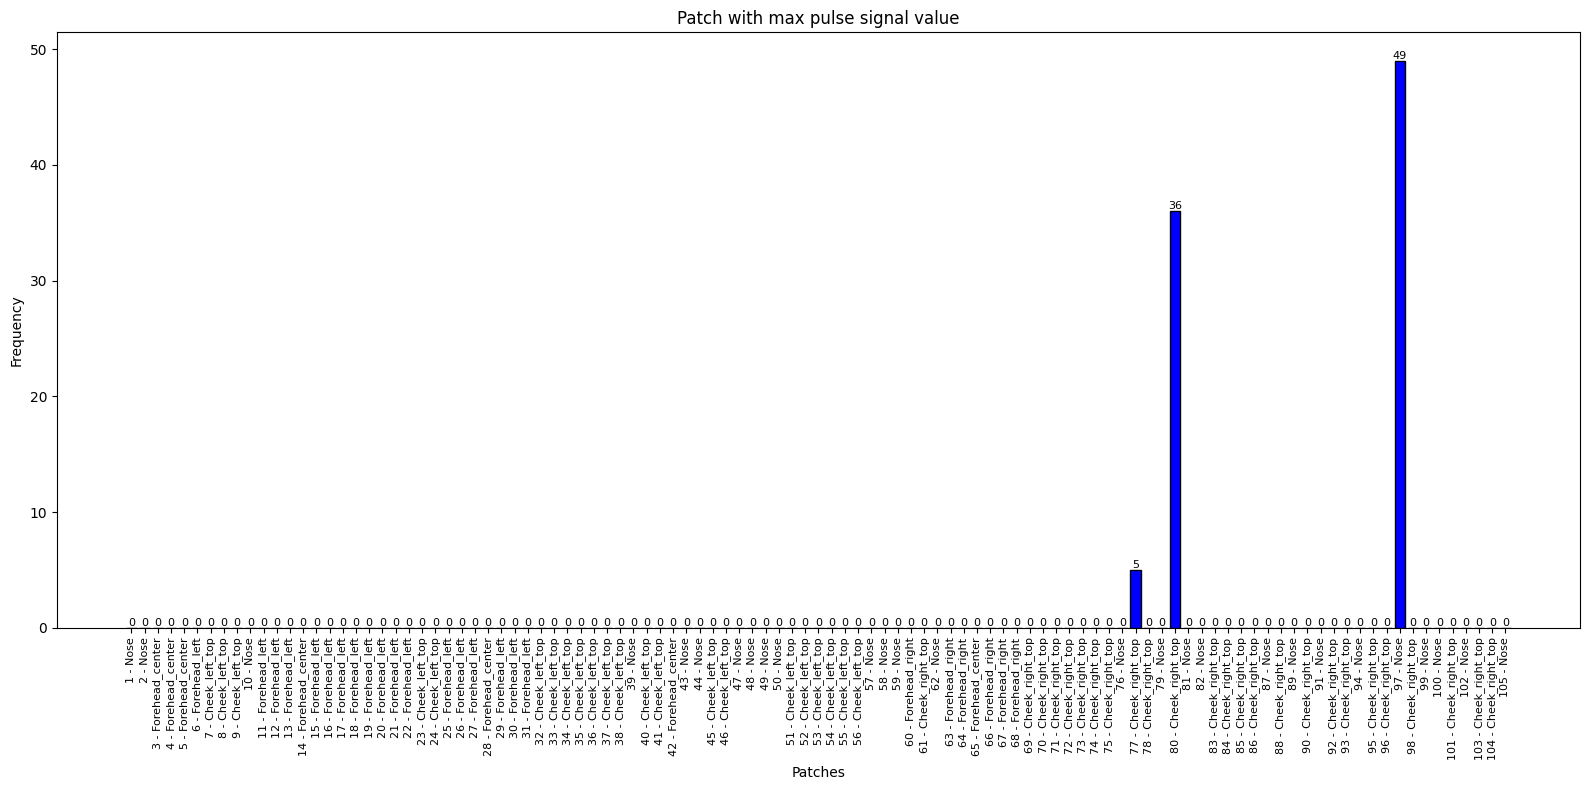

In [ ]:
import matplotlib.pyplot as plt

# Data
patches_data = [
    "1 - Nose", "2 - Nose", "3 - Forehead_center", "4 - Forehead_center", "5 - Forehead_center", "6 - Forehead_left",
    "7 - Cheek_left_top", "8 - Cheek_left_top", "9 - Cheek_left_top", "10 - Nose", "11 - Forehead_left",
    "12 - Forehead_left", "13 - Forehead_left", "14 - Forehead_center", "15 - Forehead_left", "16 - Forehead_left",
    "17 - Forehead_left", "18 - Forehead_left", "19 - Forehead_left", "20 - Forehead_left", "21 - Forehead_left",
    "22 - Forehead_left", "23 - Cheek_left_top", "24 - Cheek_left_top", "25 - Forehead_left", "26 - Forehead_left",
    "27 - Forehead_left", "28 - Forehead_center", "29 - Forehead_left", "30 - Forehead_left", "31 - Forehead_left",
    "32 - Cheek_left_top", "33 - Cheek_left_top", "34 - Cheek_left_top", "35 - Cheek_left_top", "36 - Cheek_left_top",
    "37 - Cheek_left_top", "38 - Cheek_left_top", "39 - Nose", "40 - Cheek_left_top", "41 - Cheek_left_top",
    "42 - Forehead_center", "43 - Nose", "44 - Nose", "45 - Cheek_left_top", "46 - Cheek_left_top", "47 - Nose",
    "48 - Nose", "49 - Nose", "50 - Nose", "51 - Cheek_left_top", "52 - Cheek_left_top", "53 - Cheek_left_top",
    "54 - Cheek_left_top", "55 - Cheek_left_top", "56 - Cheek_left_top", "57 - Nose", "58 - Nose", "59 - Nose",
    "60 - Forehead_right", "61 - Cheek_right_top", "62 - Nose", "63 - Forehead_right", "64 - Forehead_right",
    "65 - Forehead_center", "66 - Forehead_right", "67 - Forehead_right", "68 - Forehead_right", "69 - Cheek_right_top",
    "70 - Cheek_right_top", "71 - Cheek_right_top", "72 - Cheek_right_top", "73 - Cheek_right_top",
    "74 - Cheek_right_top", "75 - Cheek_right_top", "76 - Nose", "77 - Cheek_right_top", "78 - Cheek_right_top",
    "79 - Nose", "80 - Cheek_right_top", "81 - Nose", "82 - Nose", "83 - Cheek_right_top", "84 - Cheek_right_top",
    "85 - Cheek_right_top", "86 - Cheek_right_top", "87 - Nose", "88 - Cheek_right_top", "89 - Nose",
    "90 - Cheek_right_top", "91 - Nose", "92 - Cheek_right_top", "93 - Cheek_right_top", "94 - Nose",
    "95 - Cheek_right_top", "96 - Cheek_right_top", "97 - Nose", "98 - Cheek_right_top", "99 - Nose",
    "100 - Nose", "101 - Cheek_right_top", "102 - Nose", "103 - Cheek_right_top", "104 - Cheek_right_top",
    "105 - Nose"
]

# Values to reflect
reflected_values = {
    "80 - Cheek_right_top": 36,
    "77 - Cheek_right_top": 5,
    "97 - Nose": 49
}

# Plotting the histogram
frequency_data = [0] * 76 + [5] + [0] * 2 + [36] + [0] * 16 + [49] + [0] * 8

# Plotting the histogram
plt.figure(figsize=(16, 8))
# bar_width = 0.8
bar_positions = range(1, len(patches_data) + 1)
bars = plt.bar(bar_positions, frequency_data, color='blue', edgecolor='black')
plt.xticks(bar_positions, patches_data, rotation=90, ha='center', fontsize=8)
plt.xlabel('Patches')
plt.ylabel('Frequency')
plt.title('Patch with max pulse signal value')

# Annotate each bar with its value
for bar, value in zip(bars, frequency_data):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Read the CSV file
csv_file_path = '/content/BPM+Brightness_Data - Post_2_3_Sanjeev.csv'  # Update with the actual file path
df = pd.read_csv(csv_file_path)

# Specify the column name
column_name = 'BPM'  # Update with the actual column name

# Specify the target value
target_value = 95

# Calculate the absolute differences and sort the DataFrame
df['absolute_difference'] = abs(df[column_name] - target_value)
sorted_df = df.sort_values(by='absolute_difference')

# Retrieve the top 10 closest values
top_10_closest_values = sorted_df.head(10)

# Print the result
patches_column = top_10_closest_values['Patches']
print(patches_column.to_string(index=False))

              144-left_eye
         9-forehead_center
         50-cheek_left_top
        118-cheek_left_top
          71-forehead_left
             413-right_eye
               33-left_eye
               25-left_eye
              228-left_eye
105-forehead_left,left_eye


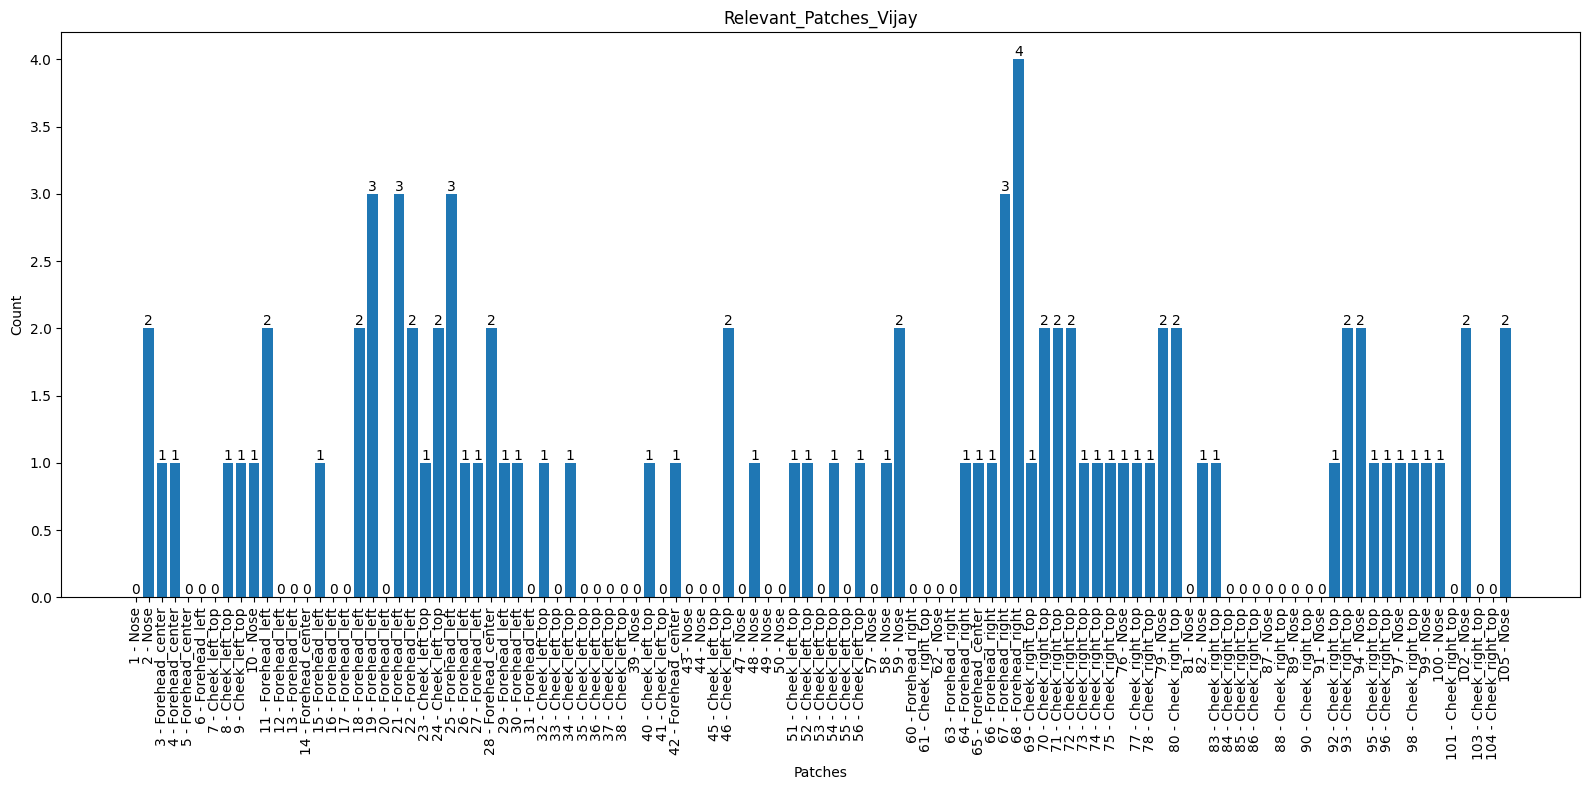

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
csv_file_path = '/content/Histogram data - With_Light_Vijay.csv'
df = pd.read_csv(csv_file_path)

# List of specified values
data = [
    "1 - Nose", "2 - Nose", "3 - Forehead_center", "4 - Forehead_center", "5 - Forehead_center",
    "6 - Forehead_left", "7 - Cheek_left_top", "8 - Cheek_left_top", "9 - Cheek_left_top", "10 - Nose",
    '11 - Forehead_left', '12 - Forehead_left', '13 - Forehead_left', '14 - Forehead_center', '15 - Forehead_left', '16 - Forehead_left', '17 - Forehead_left', '18 - Forehead_left', '19 - Forehead_left', '20 - Forehead_left', '21 - Forehead_left', '22 - Forehead_left', '23 - Cheek_left_top', '24 - Cheek_left_top', '25 - Forehead_left', '26 - Forehead_left', '27 - Forehead_left', '28 - Forehead_center', '29 - Forehead_left', '30 - Forehead_left', '31 - Forehead_left', '32 - Cheek_left_top', '33 - Cheek_left_top', '34 - Cheek_left_top', '35 - Cheek_left_top', '36 - Cheek_left_top', '37 - Cheek_left_top', '38 - Cheek_left_top', '39 - Nose', '40 - Cheek_left_top', '41 - Cheek_left_top', '42 - Forehead_center', '43 - Nose', '44 - Nose', '45 - Cheek_left_top', '46 - Cheek_left_top', '47 - Nose', '48 - Nose', '49 - Nose', '50 - Nose', '51 - Cheek_left_top', '52 - Cheek_left_top', '53 - Cheek_left_top', '54 - Cheek_left_top', '55 - Cheek_left_top', '56 - Cheek_left_top', '57 - Nose', '58 - Nose', '59 - Nose', '60 - Forehead_right', '61 - Cheek_right_top', '62 - Nose', '63 - Forehead_right', '64 - Forehead_right', '65 - Forehead_center', '66 - Forehead_right', '67 - Forehead_right', '68 - Forehead_right', '69 - Cheek_right_top', '70 - Cheek_right_top', '71 - Cheek_right_top', '72 - Cheek_right_top', '73 - Cheek_right_top', '74 - Cheek_right_top', '75 - Cheek_right_top', '76 - Nose', '77 - Cheek_right_top', '78 - Cheek_right_top', '79 - Nose', '80 - Cheek_right_top', '81 - Nose', '82 - Nose', '83 - Cheek_right_top', '84 - Cheek_right_top', '85 - Cheek_right_top', '86 - Cheek_right_top', '87 - Nose', '88 - Cheek_right_top', '89 - Nose', '90 - Cheek_right_top', '91 - Nose', '92 - Cheek_right_top', '93 - Cheek_right_top', '94 - Nose', '95 - Cheek_right_top', '96 - Cheek_right_top', '97 - Nose', '98 - Cheek_right_top', '99 - Nose', '100 - Nose',
    "101 - Cheek_right_top", "102 - Nose", "103 - Cheek_right_top", "104 - Cheek_right_top", "105 - Nose"
]


# Flatten the DataFrame and filter values
all_values = df.values.flatten()
filtered_values = [value for value in all_values if value in data]

# Count occurrences of specified values
value_counts = pd.Series(filtered_values).value_counts()

# Sort the index in ascending order based on the numbers preceding them
sorted_index = sorted(value_counts.index, key=lambda x: int(x.split(' - ')[0]))

# Create a Series with 0 count for missing elements
missing_elements = [element for element in data if element not in sorted_index]
missing_counts = pd.Series(0, index=missing_elements)

# Concatenate value_counts and missing_counts
final_value_counts = pd.concat([value_counts, missing_counts])

# Ensure index order is correct
sorted_index_2 = sorted(final_value_counts.index, key=lambda x: int(x.split(' - ')[0]))
reordered_values = final_value_counts[sorted_index_2].values
# Increase figure height for more vertical space
plt.figure(figsize=(16, 8))

# Plot a histogram with sorted index
bars = plt.bar(sorted_index_2, reordered_values, width=0.8, align='center')
plt.xlabel('Patches')
plt.ylabel('Count')
plt.title('Relevant_Patches_Vijay')
plt.xticks(rotation=90, ha='center')

# Add counts on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Display the histogram
plt.tight_layout()
plt.show()

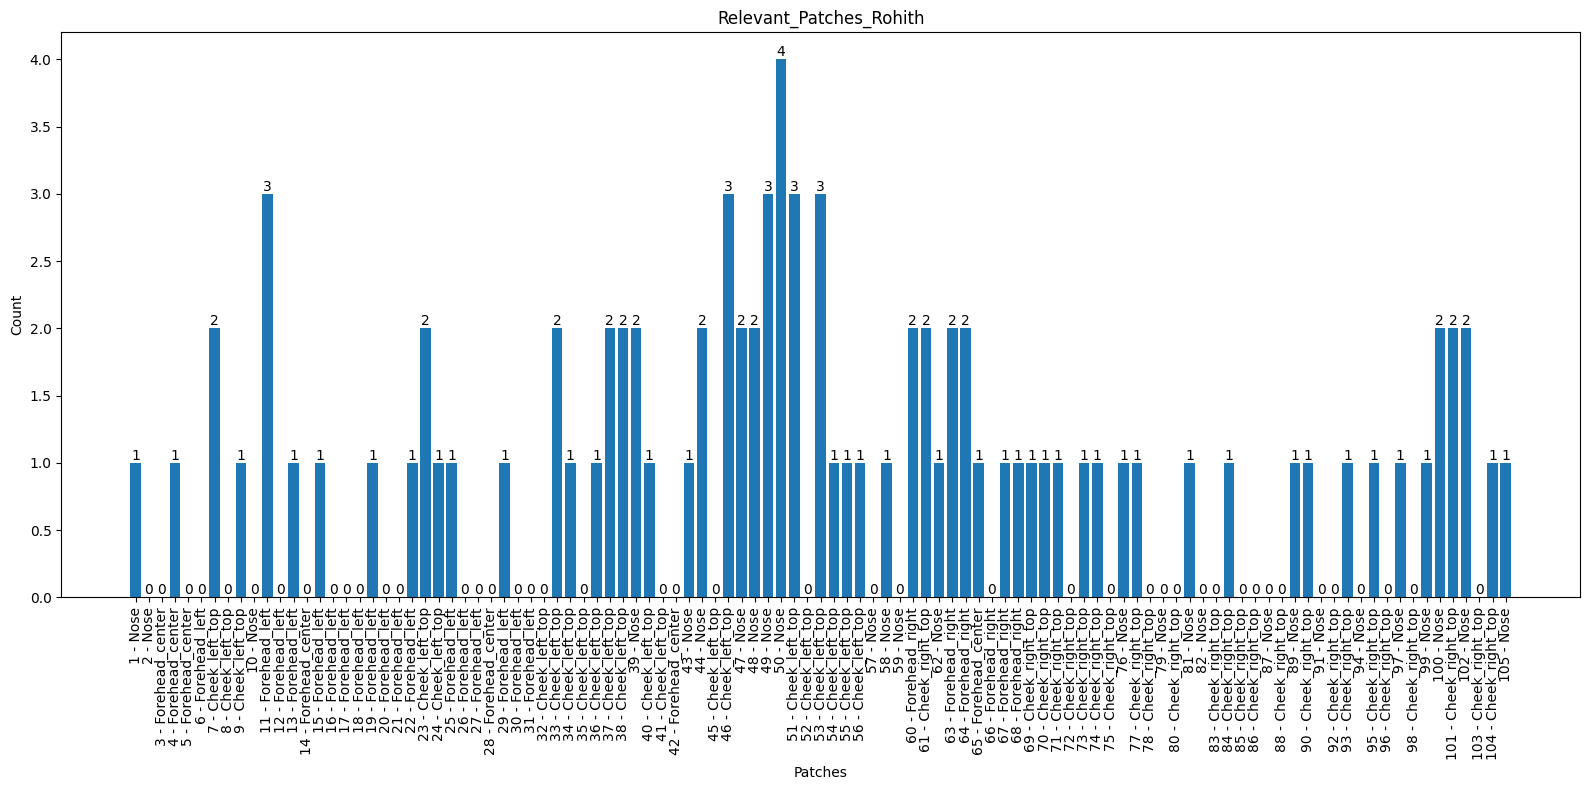

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
csv_file_path = '/content/Histogram data - With_Light_Rohith.csv'
df = pd.read_csv(csv_file_path)

# List of specified values
data = [
    "1 - Nose", "2 - Nose", "3 - Forehead_center", "4 - Forehead_center", "5 - Forehead_center",
    "6 - Forehead_left", "7 - Cheek_left_top", "8 - Cheek_left_top", "9 - Cheek_left_top", "10 - Nose",
    '11 - Forehead_left', '12 - Forehead_left', '13 - Forehead_left', '14 - Forehead_center', '15 - Forehead_left', '16 - Forehead_left', '17 - Forehead_left', '18 - Forehead_left', '19 - Forehead_left', '20 - Forehead_left', '21 - Forehead_left', '22 - Forehead_left', '23 - Cheek_left_top', '24 - Cheek_left_top', '25 - Forehead_left', '26 - Forehead_left', '27 - Forehead_left', '28 - Forehead_center', '29 - Forehead_left', '30 - Forehead_left', '31 - Forehead_left', '32 - Cheek_left_top', '33 - Cheek_left_top', '34 - Cheek_left_top', '35 - Cheek_left_top', '36 - Cheek_left_top', '37 - Cheek_left_top', '38 - Cheek_left_top', '39 - Nose', '40 - Cheek_left_top', '41 - Cheek_left_top', '42 - Forehead_center', '43 - Nose', '44 - Nose', '45 - Cheek_left_top', '46 - Cheek_left_top', '47 - Nose', '48 - Nose', '49 - Nose', '50 - Nose', '51 - Cheek_left_top', '52 - Cheek_left_top', '53 - Cheek_left_top', '54 - Cheek_left_top', '55 - Cheek_left_top', '56 - Cheek_left_top', '57 - Nose', '58 - Nose', '59 - Nose', '60 - Forehead_right', '61 - Cheek_right_top', '62 - Nose', '63 - Forehead_right', '64 - Forehead_right', '65 - Forehead_center', '66 - Forehead_right', '67 - Forehead_right', '68 - Forehead_right', '69 - Cheek_right_top', '70 - Cheek_right_top', '71 - Cheek_right_top', '72 - Cheek_right_top', '73 - Cheek_right_top', '74 - Cheek_right_top', '75 - Cheek_right_top', '76 - Nose', '77 - Cheek_right_top', '78 - Cheek_right_top', '79 - Nose', '80 - Cheek_right_top', '81 - Nose', '82 - Nose', '83 - Cheek_right_top', '84 - Cheek_right_top', '85 - Cheek_right_top', '86 - Cheek_right_top', '87 - Nose', '88 - Cheek_right_top', '89 - Nose', '90 - Cheek_right_top', '91 - Nose', '92 - Cheek_right_top', '93 - Cheek_right_top', '94 - Nose', '95 - Cheek_right_top', '96 - Cheek_right_top', '97 - Nose', '98 - Cheek_right_top', '99 - Nose', '100 - Nose',
    "101 - Cheek_right_top", "102 - Nose", "103 - Cheek_right_top", "104 - Cheek_right_top", "105 - Nose"
]


# Flatten the DataFrame and filter values
all_values = df.values.flatten()
filtered_values = [value for value in all_values if value in data]

# Count occurrences of specified values
value_counts = pd.Series(filtered_values).value_counts()

# Sort the index in ascending order based on the numbers preceding them
sorted_index = sorted(value_counts.index, key=lambda x: int(x.split(' - ')[0]))

# Create a Series with 0 count for missing elements
missing_elements = [element for element in data if element not in sorted_index]
missing_counts = pd.Series(0, index=missing_elements)

# Concatenate value_counts and missing_counts
final_value_counts = pd.concat([value_counts, missing_counts])

# Ensure index order is correct
sorted_index_2 = sorted(final_value_counts.index, key=lambda x: int(x.split(' - ')[0]))
reordered_values = final_value_counts[sorted_index_2].values
# Increase figure height for more vertical space
plt.figure(figsize=(16, 8))

# Plot a histogram with sorted index
bars = plt.bar(sorted_index_2, reordered_values, width=0.8, align='center')
plt.xlabel('Patches')
plt.ylabel('Count')
plt.title('Relevant_Patches_Rohith')
plt.xticks(rotation=90, ha='center')

# Add counts on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Display the histogram
plt.tight_layout()
plt.show()

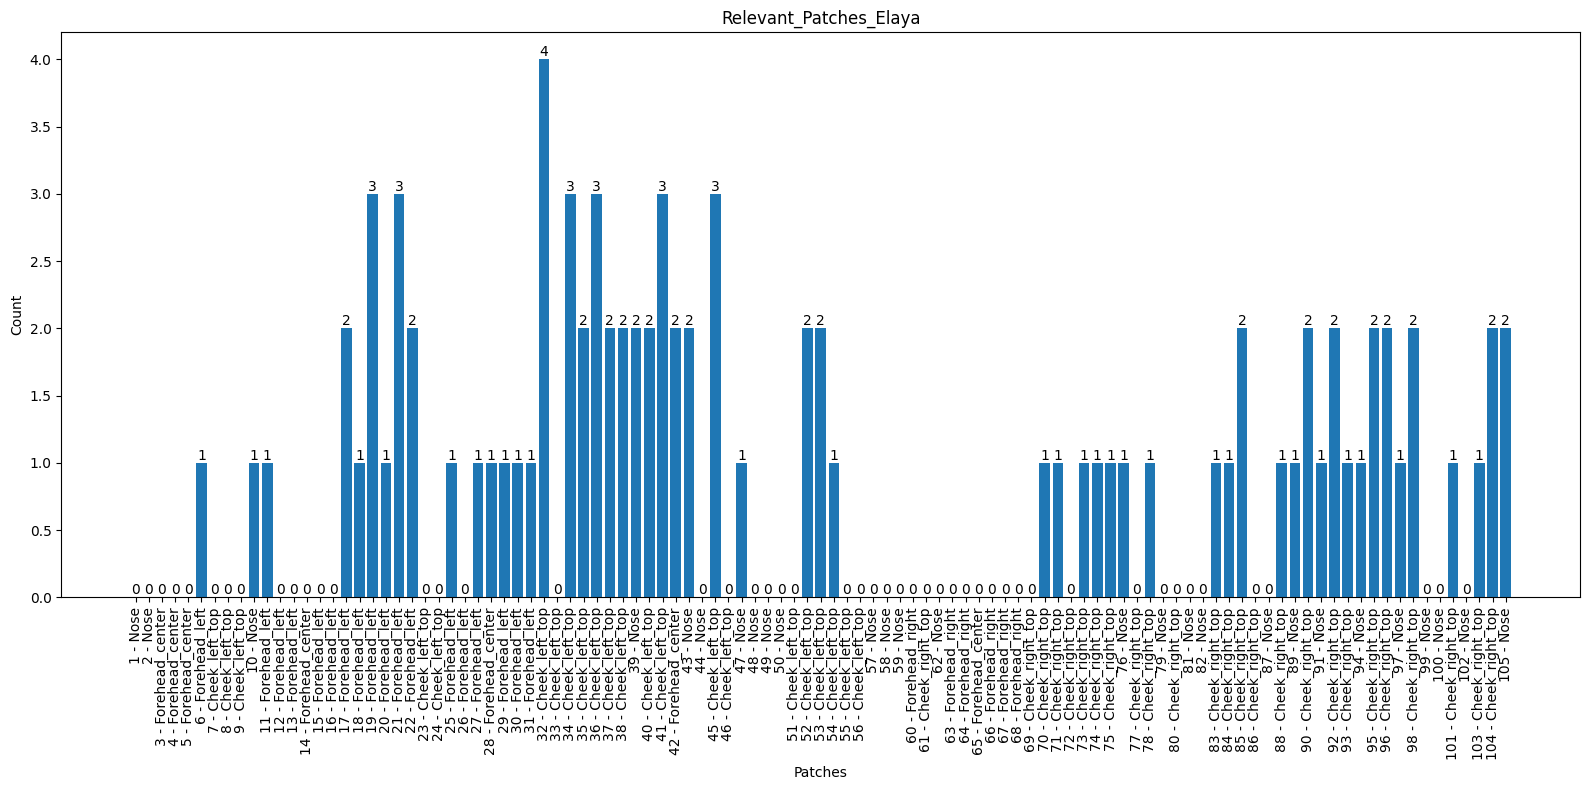

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
csv_file_path = '/content/Histogram data - With_Light_Elaya.csv'
df = pd.read_csv(csv_file_path)

# List of specified values
data = [
    "1 - Nose", "2 - Nose", "3 - Forehead_center", "4 - Forehead_center", "5 - Forehead_center",
    "6 - Forehead_left", "7 - Cheek_left_top", "8 - Cheek_left_top", "9 - Cheek_left_top", "10 - Nose",
    '11 - Forehead_left', '12 - Forehead_left', '13 - Forehead_left', '14 - Forehead_center', '15 - Forehead_left', '16 - Forehead_left', '17 - Forehead_left', '18 - Forehead_left', '19 - Forehead_left', '20 - Forehead_left', '21 - Forehead_left', '22 - Forehead_left', '23 - Cheek_left_top', '24 - Cheek_left_top', '25 - Forehead_left', '26 - Forehead_left', '27 - Forehead_left', '28 - Forehead_center', '29 - Forehead_left', '30 - Forehead_left', '31 - Forehead_left', '32 - Cheek_left_top', '33 - Cheek_left_top', '34 - Cheek_left_top', '35 - Cheek_left_top', '36 - Cheek_left_top', '37 - Cheek_left_top', '38 - Cheek_left_top', '39 - Nose', '40 - Cheek_left_top', '41 - Cheek_left_top', '42 - Forehead_center', '43 - Nose', '44 - Nose', '45 - Cheek_left_top', '46 - Cheek_left_top', '47 - Nose', '48 - Nose', '49 - Nose', '50 - Nose', '51 - Cheek_left_top', '52 - Cheek_left_top', '53 - Cheek_left_top', '54 - Cheek_left_top', '55 - Cheek_left_top', '56 - Cheek_left_top', '57 - Nose', '58 - Nose', '59 - Nose', '60 - Forehead_right', '61 - Cheek_right_top', '62 - Nose', '63 - Forehead_right', '64 - Forehead_right', '65 - Forehead_center', '66 - Forehead_right', '67 - Forehead_right', '68 - Forehead_right', '69 - Cheek_right_top', '70 - Cheek_right_top', '71 - Cheek_right_top', '72 - Cheek_right_top', '73 - Cheek_right_top', '74 - Cheek_right_top', '75 - Cheek_right_top', '76 - Nose', '77 - Cheek_right_top', '78 - Cheek_right_top', '79 - Nose', '80 - Cheek_right_top', '81 - Nose', '82 - Nose', '83 - Cheek_right_top', '84 - Cheek_right_top', '85 - Cheek_right_top', '86 - Cheek_right_top', '87 - Nose', '88 - Cheek_right_top', '89 - Nose', '90 - Cheek_right_top', '91 - Nose', '92 - Cheek_right_top', '93 - Cheek_right_top', '94 - Nose', '95 - Cheek_right_top', '96 - Cheek_right_top', '97 - Nose', '98 - Cheek_right_top', '99 - Nose', '100 - Nose',
    "101 - Cheek_right_top", "102 - Nose", "103 - Cheek_right_top", "104 - Cheek_right_top", "105 - Nose"
]


# Flatten the DataFrame and filter values
all_values = df.values.flatten()
filtered_values = [value for value in all_values if value in data]

# Count occurrences of specified values
value_counts = pd.Series(filtered_values).value_counts()

# Sort the index in ascending order based on the numbers preceding them
sorted_index = sorted(value_counts.index, key=lambda x: int(x.split(' - ')[0]))

# Create a Series with 0 count for missing elements
missing_elements = [element for element in data if element not in sorted_index]
missing_counts = pd.Series(0, index=missing_elements)

# Concatenate value_counts and missing_counts
final_value_counts = pd.concat([value_counts, missing_counts])

# Ensure index order is correct
sorted_index_2 = sorted(final_value_counts.index, key=lambda x: int(x.split(' - ')[0]))
reordered_values = final_value_counts[sorted_index_2].values
# Increase figure height for more vertical space
plt.figure(figsize=(16, 8))

# Plot a histogram with sorted index
bars = plt.bar(sorted_index_2, reordered_values, width=0.8, align='center')
plt.xlabel('Patches')
plt.ylabel('Count')
plt.title('Relevant_Patches_Elaya')
plt.xticks(rotation=90, ha='center')

# Add counts on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Display the histogram
plt.tight_layout()
plt.show()

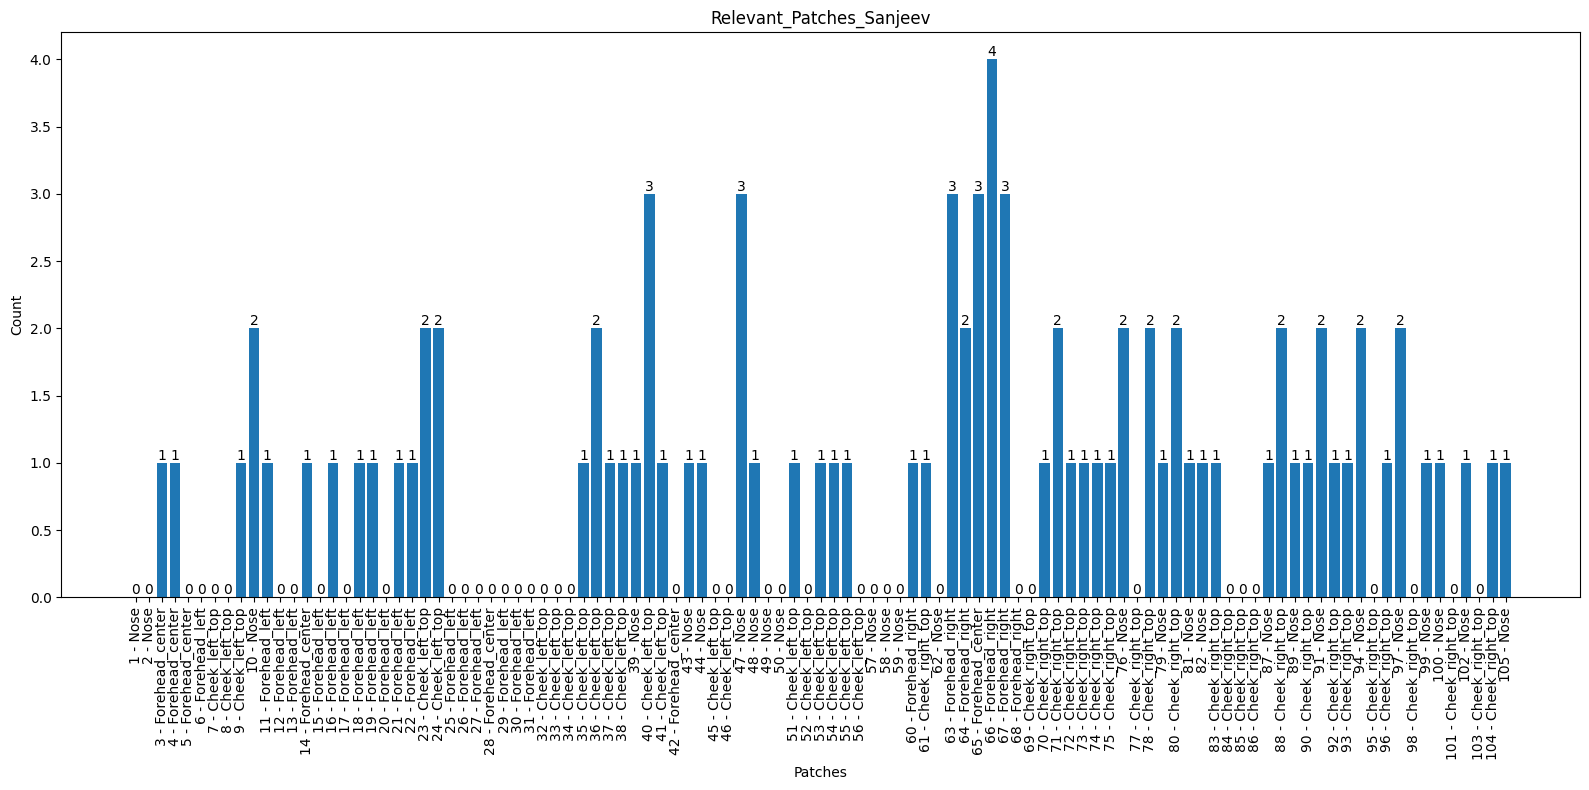

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
csv_file_path = '/content/Histogram data - With_Light_Sanjeev.csv'
df = pd.read_csv(csv_file_path)

# List of specified values
data = [
    "1 - Nose", "2 - Nose", "3 - Forehead_center", "4 - Forehead_center", "5 - Forehead_center",
    "6 - Forehead_left", "7 - Cheek_left_top", "8 - Cheek_left_top", "9 - Cheek_left_top", "10 - Nose",
    '11 - Forehead_left', '12 - Forehead_left', '13 - Forehead_left', '14 - Forehead_center', '15 - Forehead_left', '16 - Forehead_left', '17 - Forehead_left', '18 - Forehead_left', '19 - Forehead_left', '20 - Forehead_left', '21 - Forehead_left', '22 - Forehead_left', '23 - Cheek_left_top', '24 - Cheek_left_top', '25 - Forehead_left', '26 - Forehead_left', '27 - Forehead_left', '28 - Forehead_center', '29 - Forehead_left', '30 - Forehead_left', '31 - Forehead_left', '32 - Cheek_left_top', '33 - Cheek_left_top', '34 - Cheek_left_top', '35 - Cheek_left_top', '36 - Cheek_left_top', '37 - Cheek_left_top', '38 - Cheek_left_top', '39 - Nose', '40 - Cheek_left_top', '41 - Cheek_left_top', '42 - Forehead_center', '43 - Nose', '44 - Nose', '45 - Cheek_left_top', '46 - Cheek_left_top', '47 - Nose', '48 - Nose', '49 - Nose', '50 - Nose', '51 - Cheek_left_top', '52 - Cheek_left_top', '53 - Cheek_left_top', '54 - Cheek_left_top', '55 - Cheek_left_top', '56 - Cheek_left_top', '57 - Nose', '58 - Nose', '59 - Nose', '60 - Forehead_right', '61 - Cheek_right_top', '62 - Nose', '63 - Forehead_right', '64 - Forehead_right', '65 - Forehead_center', '66 - Forehead_right', '67 - Forehead_right', '68 - Forehead_right', '69 - Cheek_right_top', '70 - Cheek_right_top', '71 - Cheek_right_top', '72 - Cheek_right_top', '73 - Cheek_right_top', '74 - Cheek_right_top', '75 - Cheek_right_top', '76 - Nose', '77 - Cheek_right_top', '78 - Cheek_right_top', '79 - Nose', '80 - Cheek_right_top', '81 - Nose', '82 - Nose', '83 - Cheek_right_top', '84 - Cheek_right_top', '85 - Cheek_right_top', '86 - Cheek_right_top', '87 - Nose', '88 - Cheek_right_top', '89 - Nose', '90 - Cheek_right_top', '91 - Nose', '92 - Cheek_right_top', '93 - Cheek_right_top', '94 - Nose', '95 - Cheek_right_top', '96 - Cheek_right_top', '97 - Nose', '98 - Cheek_right_top', '99 - Nose', '100 - Nose',
    "101 - Cheek_right_top", "102 - Nose", "103 - Cheek_right_top", "104 - Cheek_right_top", "105 - Nose"
]


# Flatten the DataFrame and filter values
all_values = df.values.flatten()
filtered_values = [value for value in all_values if value in data]

# Count occurrences of specified values
value_counts = pd.Series(filtered_values).value_counts()

# Sort the index in ascending order based on the numbers preceding them
sorted_index = sorted(value_counts.index, key=lambda x: int(x.split(' - ')[0]))

# Create a Series with 0 count for missing elements
missing_elements = [element for element in data if element not in sorted_index]
missing_counts = pd.Series(0, index=missing_elements)

# Concatenate value_counts and missing_counts
final_value_counts = pd.concat([value_counts, missing_counts])

# Ensure index order is correct
sorted_index_2 = sorted(final_value_counts.index, key=lambda x: int(x.split(' - ')[0]))
reordered_values = final_value_counts[sorted_index_2].values
# Increase figure height for more vertical space
plt.figure(figsize=(16, 8))

# Plot a histogram with sorted index
bars = plt.bar(sorted_index_2, reordered_values, width=0.8, align='center')
plt.xlabel('Patches')
plt.ylabel('Count')
plt.title('Relevant_Patches_Sanjeev')
plt.xticks(rotation=90, ha='center')

# Add counts on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Display the histogram
plt.tight_layout()
plt.show()

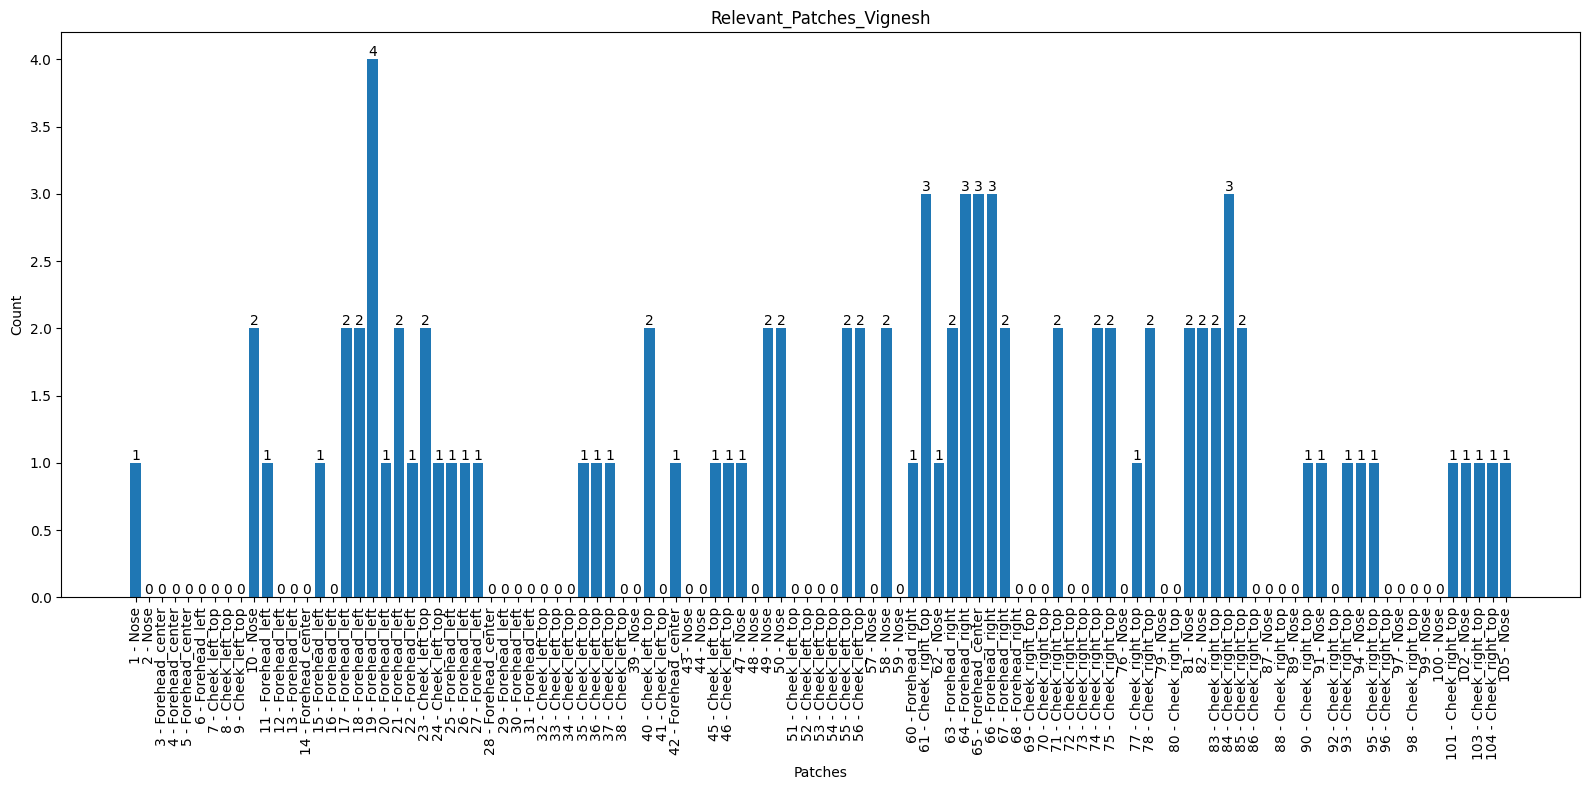

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
csv_file_path = '/content/Histogram data - With_Light_Vignesh.csv'
df = pd.read_csv(csv_file_path)

# List of specified values
data = [
    "1 - Nose", "2 - Nose", "3 - Forehead_center", "4 - Forehead_center", "5 - Forehead_center",
    "6 - Forehead_left", "7 - Cheek_left_top", "8 - Cheek_left_top", "9 - Cheek_left_top", "10 - Nose",
    '11 - Forehead_left', '12 - Forehead_left', '13 - Forehead_left', '14 - Forehead_center', '15 - Forehead_left', '16 - Forehead_left', '17 - Forehead_left', '18 - Forehead_left', '19 - Forehead_left', '20 - Forehead_left', '21 - Forehead_left', '22 - Forehead_left', '23 - Cheek_left_top', '24 - Cheek_left_top', '25 - Forehead_left', '26 - Forehead_left', '27 - Forehead_left', '28 - Forehead_center', '29 - Forehead_left', '30 - Forehead_left', '31 - Forehead_left', '32 - Cheek_left_top', '33 - Cheek_left_top', '34 - Cheek_left_top', '35 - Cheek_left_top', '36 - Cheek_left_top', '37 - Cheek_left_top', '38 - Cheek_left_top', '39 - Nose', '40 - Cheek_left_top', '41 - Cheek_left_top', '42 - Forehead_center', '43 - Nose', '44 - Nose', '45 - Cheek_left_top', '46 - Cheek_left_top', '47 - Nose', '48 - Nose', '49 - Nose', '50 - Nose', '51 - Cheek_left_top', '52 - Cheek_left_top', '53 - Cheek_left_top', '54 - Cheek_left_top', '55 - Cheek_left_top', '56 - Cheek_left_top', '57 - Nose', '58 - Nose', '59 - Nose', '60 - Forehead_right', '61 - Cheek_right_top', '62 - Nose', '63 - Forehead_right', '64 - Forehead_right', '65 - Forehead_center', '66 - Forehead_right', '67 - Forehead_right', '68 - Forehead_right', '69 - Cheek_right_top', '70 - Cheek_right_top', '71 - Cheek_right_top', '72 - Cheek_right_top', '73 - Cheek_right_top', '74 - Cheek_right_top', '75 - Cheek_right_top', '76 - Nose', '77 - Cheek_right_top', '78 - Cheek_right_top', '79 - Nose', '80 - Cheek_right_top', '81 - Nose', '82 - Nose', '83 - Cheek_right_top', '84 - Cheek_right_top', '85 - Cheek_right_top', '86 - Cheek_right_top', '87 - Nose', '88 - Cheek_right_top', '89 - Nose', '90 - Cheek_right_top', '91 - Nose', '92 - Cheek_right_top', '93 - Cheek_right_top', '94 - Nose', '95 - Cheek_right_top', '96 - Cheek_right_top', '97 - Nose', '98 - Cheek_right_top', '99 - Nose', '100 - Nose',
    "101 - Cheek_right_top", "102 - Nose", "103 - Cheek_right_top", "104 - Cheek_right_top", "105 - Nose"
]


# Flatten the DataFrame and filter values
all_values = df.values.flatten()
filtered_values = [value for value in all_values if value in data]

# Count occurrences of specified values
value_counts = pd.Series(filtered_values).value_counts()

# Sort the index in ascending order based on the numbers preceding them
sorted_index = sorted(value_counts.index, key=lambda x: int(x.split(' - ')[0]))

# Create a Series with 0 count for missing elements
missing_elements = [element for element in data if element not in sorted_index]
missing_counts = pd.Series(0, index=missing_elements)

# Concatenate value_counts and missing_counts
final_value_counts = pd.concat([value_counts, missing_counts])

# Ensure index order is correct
sorted_index_2 = sorted(final_value_counts.index, key=lambda x: int(x.split(' - ')[0]))
reordered_values = final_value_counts[sorted_index_2].values
# Increase figure height for more vertical space
plt.figure(figsize=(16, 8))

# Plot a histogram with sorted index
bars = plt.bar(sorted_index_2, reordered_values, width=0.8, align='center')
plt.xlabel('Patches')
plt.ylabel('Count')
plt.title('Relevant_Patches_Vignesh')
plt.xticks(rotation=90, ha='center')

# Add counts on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Display the histogram
plt.tight_layout()
plt.show()

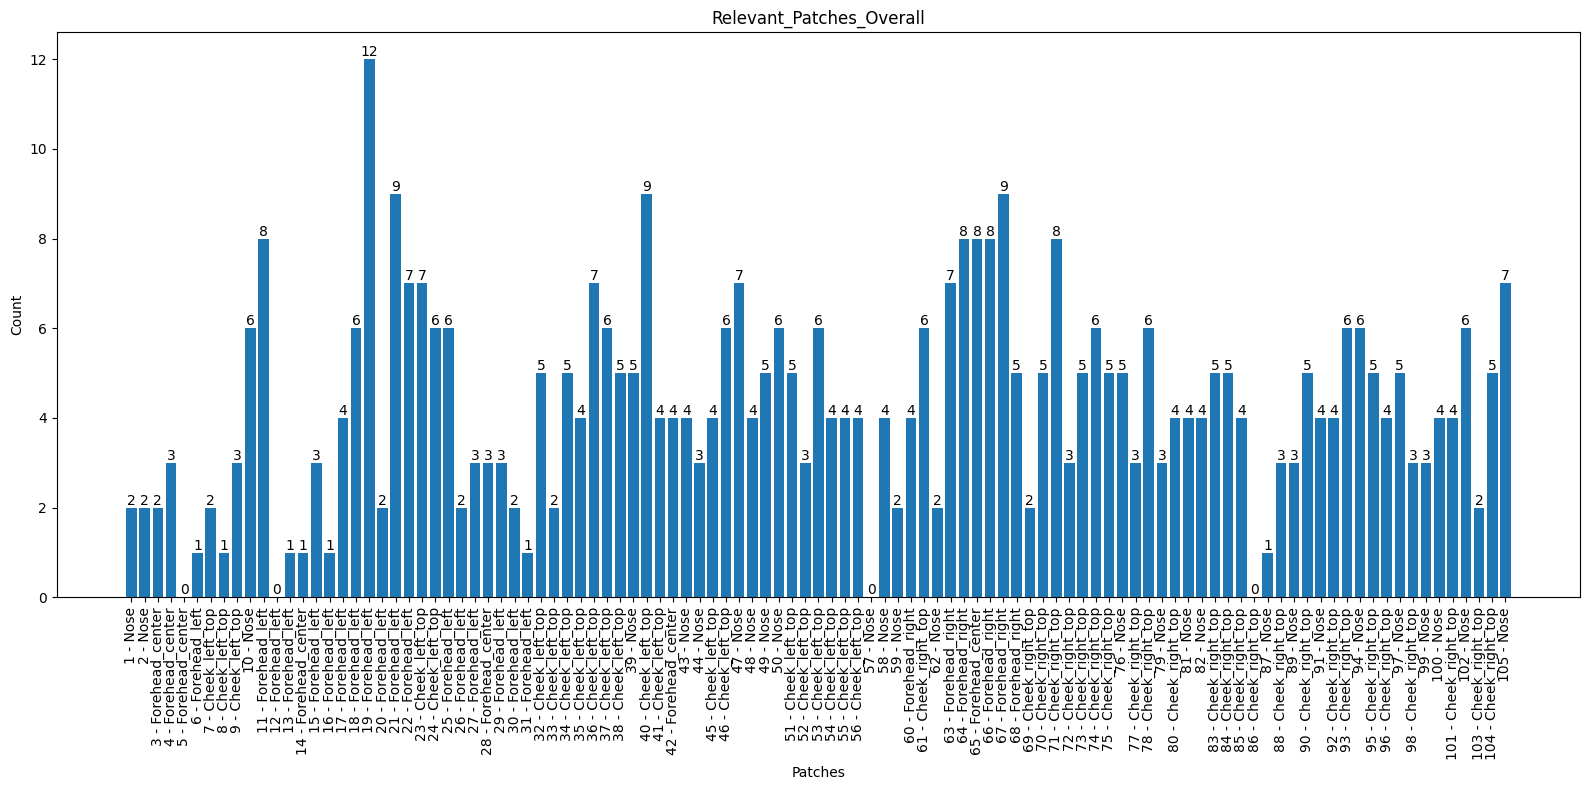

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
csv_file_path = '/content/Histogram data - With_Light_Overall (3).csv'
df = pd.read_csv(csv_file_path)

# List of specified values
data = [
    "1 - Nose", "2 - Nose", "3 - Forehead_center", "4 - Forehead_center", "5 - Forehead_center",
    "6 - Forehead_left", "7 - Cheek_left_top", "8 - Cheek_left_top", "9 - Cheek_left_top", "10 - Nose",
    '11 - Forehead_left', '12 - Forehead_left', '13 - Forehead_left', '14 - Forehead_center', '15 - Forehead_left', '16 - Forehead_left', '17 - Forehead_left', '18 - Forehead_left', '19 - Forehead_left', '20 - Forehead_left', '21 - Forehead_left', '22 - Forehead_left', '23 - Cheek_left_top', '24 - Cheek_left_top', '25 - Forehead_left', '26 - Forehead_left', '27 - Forehead_left', '28 - Forehead_center', '29 - Forehead_left', '30 - Forehead_left', '31 - Forehead_left', '32 - Cheek_left_top', '33 - Cheek_left_top', '34 - Cheek_left_top', '35 - Cheek_left_top', '36 - Cheek_left_top', '37 - Cheek_left_top', '38 - Cheek_left_top', '39 - Nose', '40 - Cheek_left_top', '41 - Cheek_left_top', '42 - Forehead_center', '43 - Nose', '44 - Nose', '45 - Cheek_left_top', '46 - Cheek_left_top', '47 - Nose', '48 - Nose', '49 - Nose', '50 - Nose', '51 - Cheek_left_top', '52 - Cheek_left_top', '53 - Cheek_left_top', '54 - Cheek_left_top', '55 - Cheek_left_top', '56 - Cheek_left_top', '57 - Nose', '58 - Nose', '59 - Nose', '60 - Forehead_right', '61 - Cheek_right_top', '62 - Nose', '63 - Forehead_right', '64 - Forehead_right', '65 - Forehead_center', '66 - Forehead_right', '67 - Forehead_right', '68 - Forehead_right', '69 - Cheek_right_top', '70 - Cheek_right_top', '71 - Cheek_right_top', '72 - Cheek_right_top', '73 - Cheek_right_top', '74 - Cheek_right_top', '75 - Cheek_right_top', '76 - Nose', '77 - Cheek_right_top', '78 - Cheek_right_top', '79 - Nose', '80 - Cheek_right_top', '81 - Nose', '82 - Nose', '83 - Cheek_right_top', '84 - Cheek_right_top', '85 - Cheek_right_top', '86 - Cheek_right_top', '87 - Nose', '88 - Cheek_right_top', '89 - Nose', '90 - Cheek_right_top', '91 - Nose', '92 - Cheek_right_top', '93 - Cheek_right_top', '94 - Nose', '95 - Cheek_right_top', '96 - Cheek_right_top', '97 - Nose', '98 - Cheek_right_top', '99 - Nose', '100 - Nose',
    "101 - Cheek_right_top", "102 - Nose", "103 - Cheek_right_top", "104 - Cheek_right_top", "105 - Nose"
]

# Flatten the DataFrame and filter values
all_values = df.values.flatten()
filtered_values = [value for value in all_values if value in data]

# Count occurrences of specified values
value_counts = pd.Series(filtered_values).value_counts()

# Sort the index in ascending order based on the numbers preceding them
sorted_index = sorted(value_counts.index, key=lambda x: int(x.split(' - ')[0]))

# Create a Series with 0 count for missing elements
missing_elements = [element for element in data if element not in sorted_index]
missing_counts = pd.Series(0, index=missing_elements)

# Concatenate value_counts and missing_counts
final_value_counts = pd.concat([value_counts, missing_counts])

# Ensure index order is correct
sorted_index_2 = sorted(final_value_counts.index, key=lambda x: int(x.split(' - ')[0]))
reordered_values = final_value_counts[sorted_index_2].values
# Increase figure height for more vertical space
plt.figure(figsize=(16, 8))

# Plot a histogram with sorted index
bars = plt.bar(sorted_index_2, reordered_values, width=0.8, align='center')
plt.xlabel('Patches')
plt.ylabel('Count')
plt.title('Relevant_Patches_Overall')
plt.xticks(rotation=90, ha='center')

# Add counts on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Display the histogram
plt.tight_layout()
plt.show();

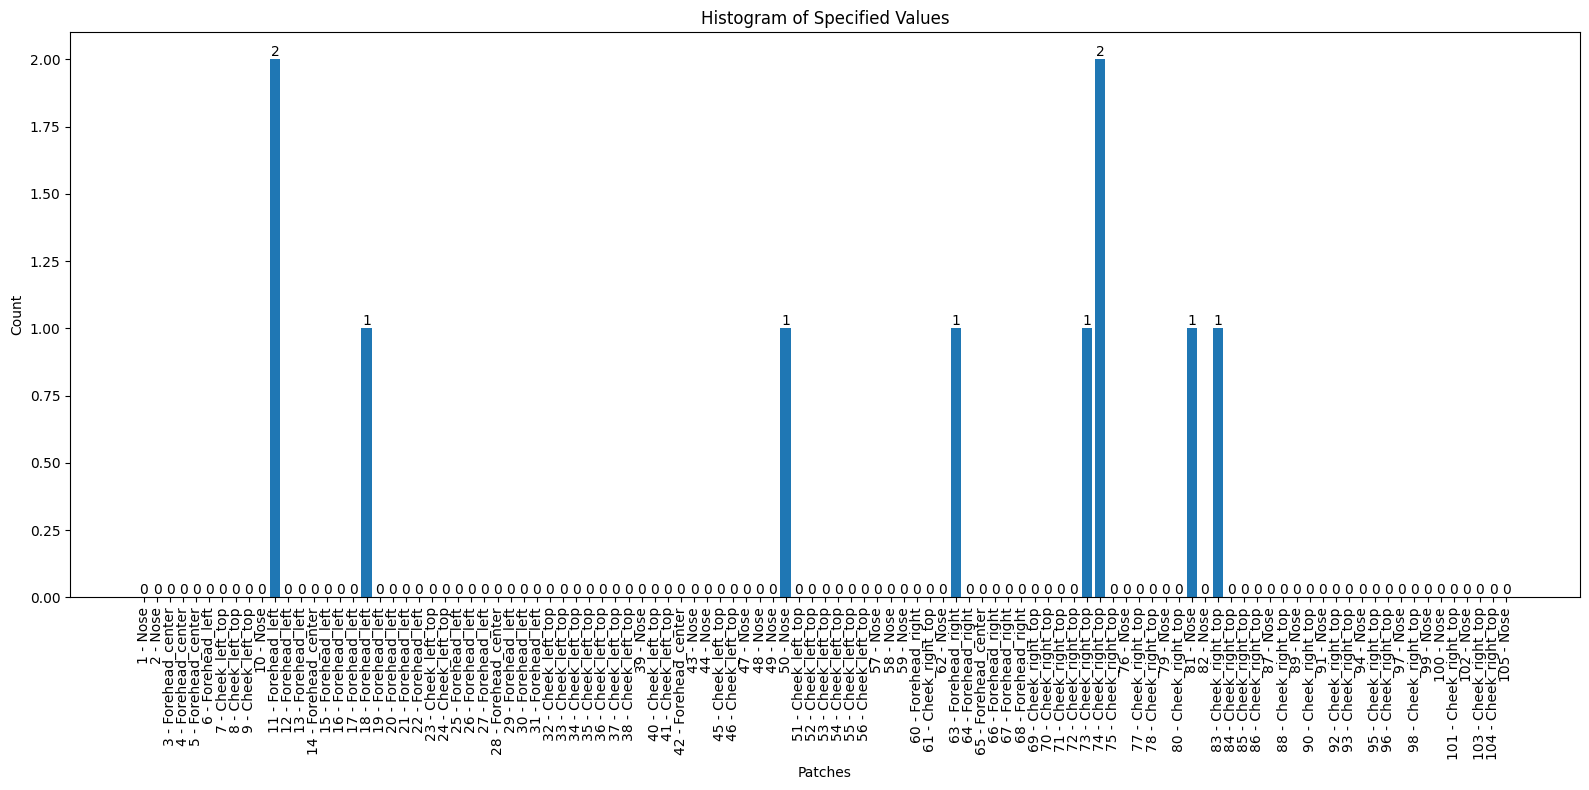

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
csv_file_path = '/content/Histogram data - Without_Light_Vijay.csv'
df = pd.read_csv(csv_file_path)

# List of specified values
data = [
    "1 - Nose", "2 - Nose", "3 - Forehead_center", "4 - Forehead_center", "5 - Forehead_center",
    "6 - Forehead_left", "7 - Cheek_left_top", "8 - Cheek_left_top", "9 - Cheek_left_top", "10 - Nose",
    '11 - Forehead_left', '12 - Forehead_left', '13 - Forehead_left', '14 - Forehead_center', '15 - Forehead_left', '16 - Forehead_left', '17 - Forehead_left', '18 - Forehead_left', '19 - Forehead_left', '20 - Forehead_left', '21 - Forehead_left', '22 - Forehead_left', '23 - Cheek_left_top', '24 - Cheek_left_top', '25 - Forehead_left', '26 - Forehead_left', '27 - Forehead_left', '28 - Forehead_center', '29 - Forehead_left', '30 - Forehead_left', '31 - Forehead_left', '32 - Cheek_left_top', '33 - Cheek_left_top', '34 - Cheek_left_top', '35 - Cheek_left_top', '36 - Cheek_left_top', '37 - Cheek_left_top', '38 - Cheek_left_top', '39 - Nose', '40 - Cheek_left_top', '41 - Cheek_left_top', '42 - Forehead_center', '43 - Nose', '44 - Nose', '45 - Cheek_left_top', '46 - Cheek_left_top', '47 - Nose', '48 - Nose', '49 - Nose', '50 - Nose', '51 - Cheek_left_top', '52 - Cheek_left_top', '53 - Cheek_left_top', '54 - Cheek_left_top', '55 - Cheek_left_top', '56 - Cheek_left_top', '57 - Nose', '58 - Nose', '59 - Nose', '60 - Forehead_right', '61 - Cheek_right_top', '62 - Nose', '63 - Forehead_right', '64 - Forehead_right', '65 - Forehead_center', '66 - Forehead_right', '67 - Forehead_right', '68 - Forehead_right', '69 - Cheek_right_top', '70 - Cheek_right_top', '71 - Cheek_right_top', '72 - Cheek_right_top', '73 - Cheek_right_top', '74 - Cheek_right_top', '75 - Cheek_right_top', '76 - Nose', '77 - Cheek_right_top', '78 - Cheek_right_top', '79 - Nose', '80 - Cheek_right_top', '81 - Nose', '82 - Nose', '83 - Cheek_right_top', '84 - Cheek_right_top', '85 - Cheek_right_top', '86 - Cheek_right_top', '87 - Nose', '88 - Cheek_right_top', '89 - Nose', '90 - Cheek_right_top', '91 - Nose', '92 - Cheek_right_top', '93 - Cheek_right_top', '94 - Nose', '95 - Cheek_right_top', '96 - Cheek_right_top', '97 - Nose', '98 - Cheek_right_top', '99 - Nose', '100 - Nose',
    "101 - Cheek_right_top", "102 - Nose", "103 - Cheek_right_top", "104 - Cheek_right_top", "105 - Nose"
]


# Flatten the DataFrame and filter values
all_values = df.values.flatten()
filtered_values = [value for value in all_values if value in data]

# Count occurrences of specified values
value_counts = pd.Series(filtered_values).value_counts()

# Sort the index in ascending order based on the numbers preceding them
sorted_index = sorted(value_counts.index, key=lambda x: int(x.split(' - ')[0]))

# Create a Series with 0 count for missing elements
missing_elements = [element for element in data if element not in sorted_index]
missing_counts = pd.Series(0, index=missing_elements)

# Concatenate value_counts and missing_counts
final_value_counts = pd.concat([value_counts, missing_counts])

# Ensure index order is correct
sorted_index_2 = sorted(final_value_counts.index, key=lambda x: int(x.split(' - ')[0]))
reordered_values = final_value_counts[sorted_index_2].values
# Increase figure height for more vertical space
plt.figure(figsize=(16, 8))

# Plot a histogram with sorted index
bars = plt.bar(sorted_index_2, reordered_values, width=0.8, align='center')
plt.xlabel('Patches')
plt.ylabel('Count')
plt.title('Histogram of Specified Values')
plt.xticks(rotation=90, ha='center')

# Add counts on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Display the histogram
plt.tight_layout()
plt.show()

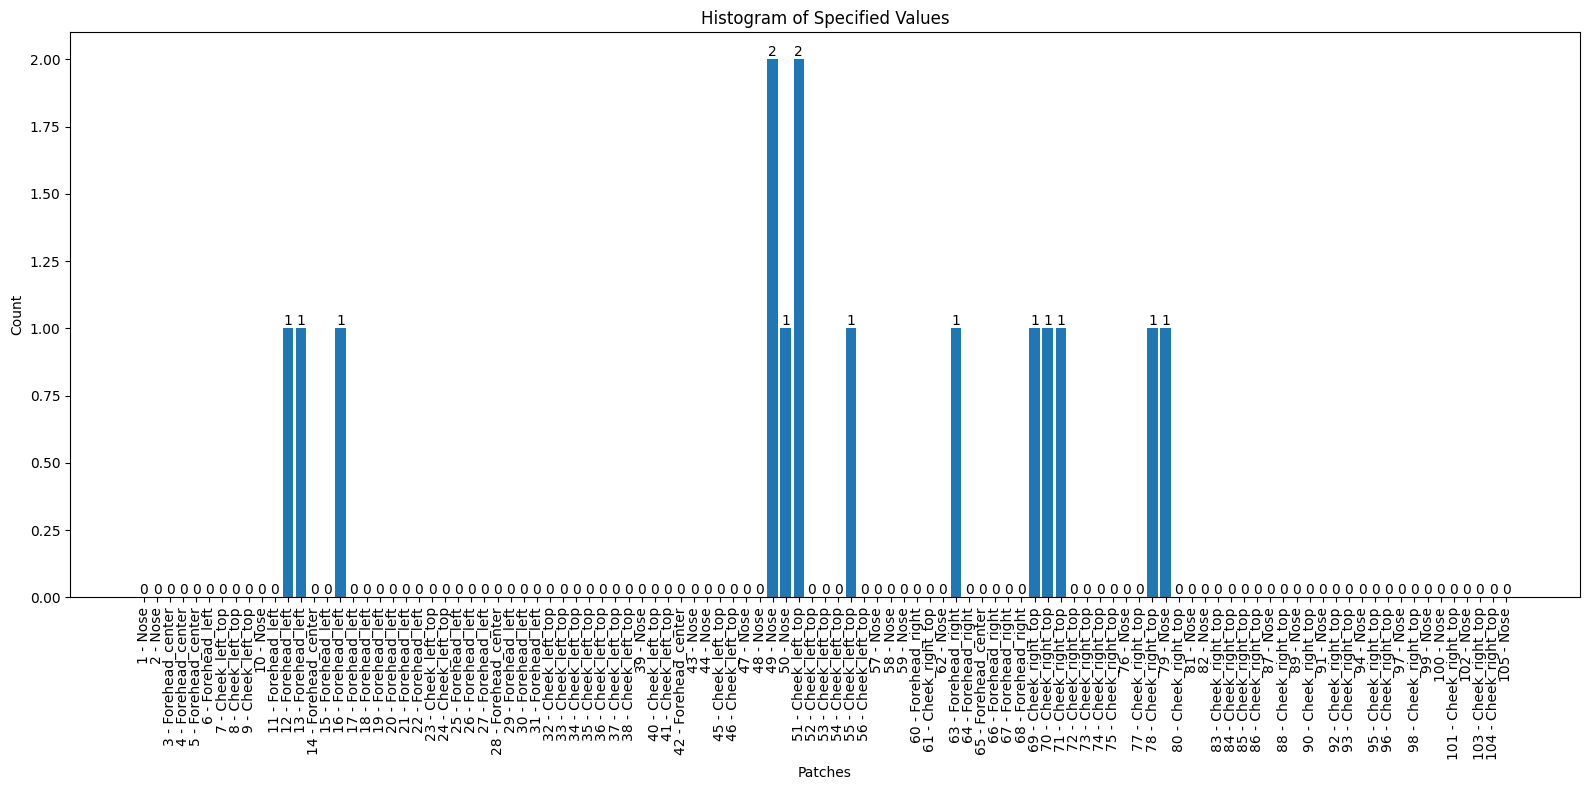

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
csv_file_path = '/content/Histogram data - Without_Light_Rohith.csv'
df = pd.read_csv(csv_file_path)

# List of specified values
data = [
    "1 - Nose", "2 - Nose", "3 - Forehead_center", "4 - Forehead_center", "5 - Forehead_center",
    "6 - Forehead_left", "7 - Cheek_left_top", "8 - Cheek_left_top", "9 - Cheek_left_top", "10 - Nose",
    '11 - Forehead_left', '12 - Forehead_left', '13 - Forehead_left', '14 - Forehead_center', '15 - Forehead_left', '16 - Forehead_left', '17 - Forehead_left', '18 - Forehead_left', '19 - Forehead_left', '20 - Forehead_left', '21 - Forehead_left', '22 - Forehead_left', '23 - Cheek_left_top', '24 - Cheek_left_top', '25 - Forehead_left', '26 - Forehead_left', '27 - Forehead_left', '28 - Forehead_center', '29 - Forehead_left', '30 - Forehead_left', '31 - Forehead_left', '32 - Cheek_left_top', '33 - Cheek_left_top', '34 - Cheek_left_top', '35 - Cheek_left_top', '36 - Cheek_left_top', '37 - Cheek_left_top', '38 - Cheek_left_top', '39 - Nose', '40 - Cheek_left_top', '41 - Cheek_left_top', '42 - Forehead_center', '43 - Nose', '44 - Nose', '45 - Cheek_left_top', '46 - Cheek_left_top', '47 - Nose', '48 - Nose', '49 - Nose', '50 - Nose', '51 - Cheek_left_top', '52 - Cheek_left_top', '53 - Cheek_left_top', '54 - Cheek_left_top', '55 - Cheek_left_top', '56 - Cheek_left_top', '57 - Nose', '58 - Nose', '59 - Nose', '60 - Forehead_right', '61 - Cheek_right_top', '62 - Nose', '63 - Forehead_right', '64 - Forehead_right', '65 - Forehead_center', '66 - Forehead_right', '67 - Forehead_right', '68 - Forehead_right', '69 - Cheek_right_top', '70 - Cheek_right_top', '71 - Cheek_right_top', '72 - Cheek_right_top', '73 - Cheek_right_top', '74 - Cheek_right_top', '75 - Cheek_right_top', '76 - Nose', '77 - Cheek_right_top', '78 - Cheek_right_top', '79 - Nose', '80 - Cheek_right_top', '81 - Nose', '82 - Nose', '83 - Cheek_right_top', '84 - Cheek_right_top', '85 - Cheek_right_top', '86 - Cheek_right_top', '87 - Nose', '88 - Cheek_right_top', '89 - Nose', '90 - Cheek_right_top', '91 - Nose', '92 - Cheek_right_top', '93 - Cheek_right_top', '94 - Nose', '95 - Cheek_right_top', '96 - Cheek_right_top', '97 - Nose', '98 - Cheek_right_top', '99 - Nose', '100 - Nose',
    "101 - Cheek_right_top", "102 - Nose", "103 - Cheek_right_top", "104 - Cheek_right_top", "105 - Nose"
]


# Flatten the DataFrame and filter values
all_values = df.values.flatten()
filtered_values = [value for value in all_values if value in data]

# Count occurrences of specified values
value_counts = pd.Series(filtered_values).value_counts()

# Sort the index in ascending order based on the numbers preceding them
sorted_index = sorted(value_counts.index, key=lambda x: int(x.split(' - ')[0]))

# Create a Series with 0 count for missing elements
missing_elements = [element for element in data if element not in sorted_index]
missing_counts = pd.Series(0, index=missing_elements)

# Concatenate value_counts and missing_counts
final_value_counts = pd.concat([value_counts, missing_counts])

# Ensure index order is correct
sorted_index_2 = sorted(final_value_counts.index, key=lambda x: int(x.split(' - ')[0]))
reordered_values = final_value_counts[sorted_index_2].values
# Increase figure height for more vertical space
plt.figure(figsize=(16, 8))

# Plot a histogram with sorted index
bars = plt.bar(sorted_index_2, reordered_values, width=0.8, align='center')
plt.xlabel('Patches')
plt.ylabel('Count')
plt.title('Histogram of Specified Values')
plt.xticks(rotation=90, ha='center')

# Add counts on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Display the histogram
plt.tight_layout()
plt.show()

Cluster 1 Range: 39.55 - 90.53 (Number of Points: 903)
Cluster 2 Range: 148.54 - 232.03 (Number of Points: 184)
Cluster 3 Range: 91.41 - 147.66 (Number of Points: 488)


<Figure size 640x480 with 0 Axes>

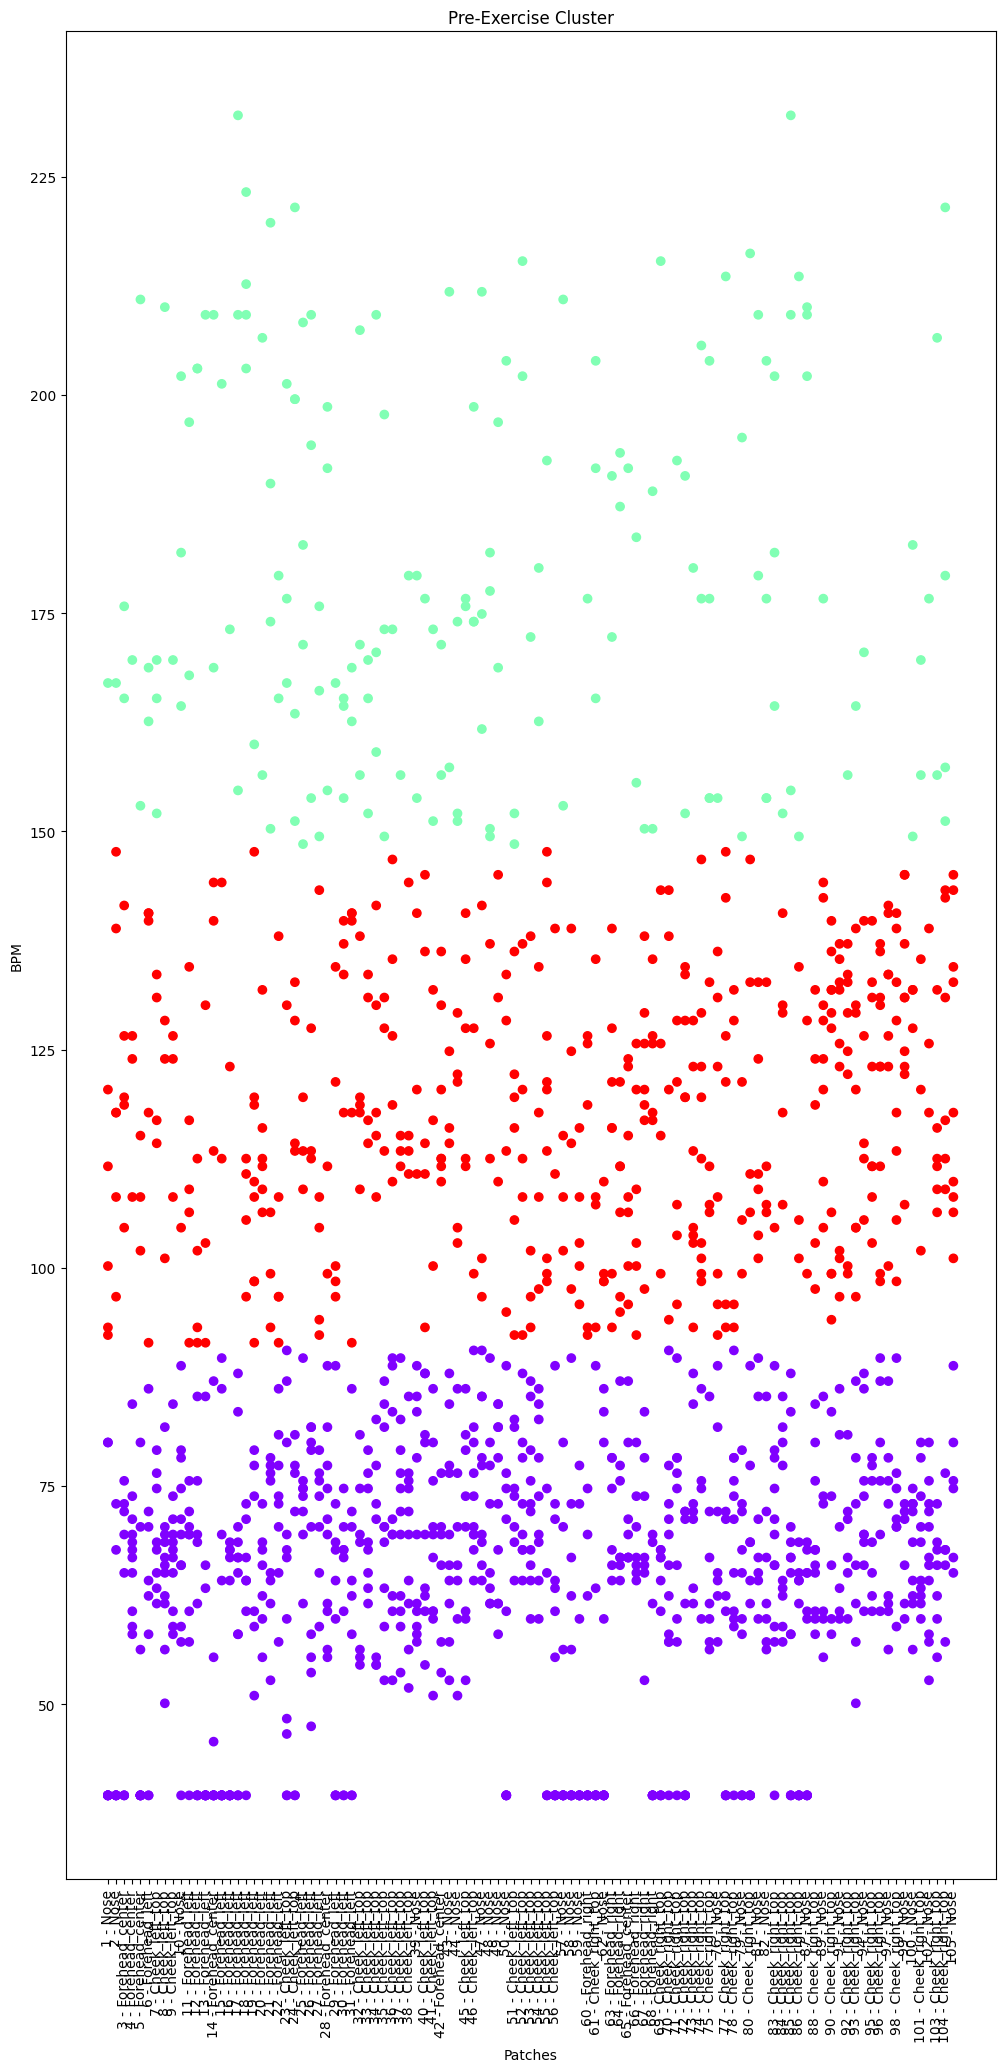

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the CSV files
file1 = pd.read_csv("/content/BPM_Data - Sheet1.csv")
file2 = pd.read_csv("/content/BPM_Data - BPM_Pre-Exercise-2_Vijay.csv")
file3 = pd.read_csv("/content/BPM_Data - BPM_Pre-Exercise-3_Vijay.csv")
file4 = pd.read_csv("/content/BPM_Data - BPM-Pre_Exercise_1_Rohith.csv")
file5 = pd.read_csv("/content/BPM_Data - BPM-Pre_Exercise_2_Rohith.csv")
file6 = pd.read_csv("/content/BPM_Data - BPM-Pre_Exercise_3_Rohith.csv")
file7 = pd.read_csv("/content/BPM_Data - BPM_Pre_Exercise_1_Elayaraja.csv")
file8 = pd.read_csv("/content/BPM_Data - BPM_Pre_Exercise_2_Elayaraja.csv")
file9 = pd.read_csv("/content/BPM_Data - BPM_Pre_Exercise_3_Elayaraja.csv")
file10 = pd.read_csv("/content/BPM_Data - BPM_Pre_Exercise_1_Sanjeev.csv")
file11 = pd.read_csv("/content/BPM_Data - BPM_Pre_Exercise_2_Sanjeev.csv")
file12 = pd.read_csv("/content/BPM_Data - BPM_Pre_Exercise_3_Sanjeev.csv")
file13 = pd.read_csv("/content/BPM_Data - BPM_Pre_Exercise_1_Vignesh.csv")
file14 = pd.read_csv("/content/BPM_Data - BPM_Pre_Exercise_2_Vignesh.csv")
file15 = pd.read_csv("/content/BPM_Data - BPM_Pre_Exercise_3_Vignesh.csv")

combined_data = pd.concat([file1, file2, file3,file4,file5,file6,file7,file8,file9,file10,file11,file12,file13,file14,file15], ignore_index=True)

# Specify the number of clusters
k = 3

# Initialize KMeans model
kmeans = KMeans(n_clusters=k, n_init=50, random_state=0)
cluster_labels = kmeans.fit_predict(combined_data[['BPM']])

# Add cluster labels to the dataframe
combined_data['Cluster'] = cluster_labels

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Find ranges for each cluster
cluster_ranges = []
for i, center in enumerate(cluster_centers):
    cluster_data = combined_data[combined_data['Cluster'] == i]
    min_value = cluster_data['BPM'].min()
    max_value = cluster_data['BPM'].max()
    cluster_ranges.append((min_value, max_value))

# Print cluster ranges and no of points in a cluster
for i, (min_val, max_val) in enumerate(cluster_ranges):
    cluster_data = combined_data[combined_data['Cluster'] == i]
    num_points = cluster_data.shape[0]
    print(f"Cluster {i+1} Range: {min_val:.2f} - {max_val:.2f} (Number of Points: {num_points})")

# Filter points between 70 and 85 BPM
range_70_90 = combined_data[(combined_data['BPM'] >= 72) & (combined_data['BPM'] <= 100)]

# Filter points between 85 and 115 BPM
# range_90_120 = combined_data[(combined_data['BPM'] > 106) & (combined_data['BPM'] <= 134)]

# Save points between 70 and 90 BPM to a CSV file
range_70_90.to_csv('72-100_clst.csv', index=False)

# Save points between 90 and 120 BPM to a CSV file
# range_90_120.to_csv('106-134_clst.csv', index=False)

# Visualize the clusters
plt.subplots_adjust(wspace=50.0)
plt.figure(figsize=(12, 24))
plt.scatter(combined_data['Patches'], combined_data['BPM'], c=cluster_labels, cmap='rainbow')
plt.xlabel('Patches')
plt.xticks(rotation=90, ha='center')
plt.ylabel('BPM')
plt.title('Pre-Exercise Cluster')
plt.show()

df_70_85 = pd.read_csv('72-100_clst.csv')
# df_85_120 = pd.read_csv('106-134_clst.csv')

# Count the occurrences of each element in 'Patches'
patch_counts_70_85 = df_70_85['Patches'].value_counts()
# patch_counts_85_120 = df_85_120['Patches'].value_counts()

# Add 'count' column to each dataframe
df_70_85['count'] = df_70_85['Patches'].map(patch_counts_70_85)
# df_85_120['count'] = df_85_120['Patches'].map(patch_counts_85_120)

# Save modified dataframes to new CSV files
df_70_85.to_csv('72-100_clst_count.csv', index=False)
# df_85_120.to_csv('100-115_clst_count.csv', index=False)

df_70_85_count = pd.read_csv('72-100_clst_count.csv')
# df_85_120_count = pd.read_csv('100-115_clst_count.csv')

# Sort dataframes based on 'count' column in descending order
sorted_df_70_85 = df_70_85_count.sort_values(by='count', ascending=False)
# sorted_df_85_120 = df_85_120_count.sort_values(by='count', ascending=False)

# Save sorted dataframes to new CSV files
sorted_df_70_85.to_csv('72-100_sorted.csv', index=False)
# sorted_df_85_120.to_csv('100-115_sorted.csv', index=False)

Cluster 1 Range: 39.55 - 89.65 (Number of Points: 806)
Cluster 2 Range: 90.53 - 148.54 (Number of Points: 536)
Cluster 3 Range: 149.41 - 226.76 (Number of Points: 233)


<Figure size 640x480 with 0 Axes>

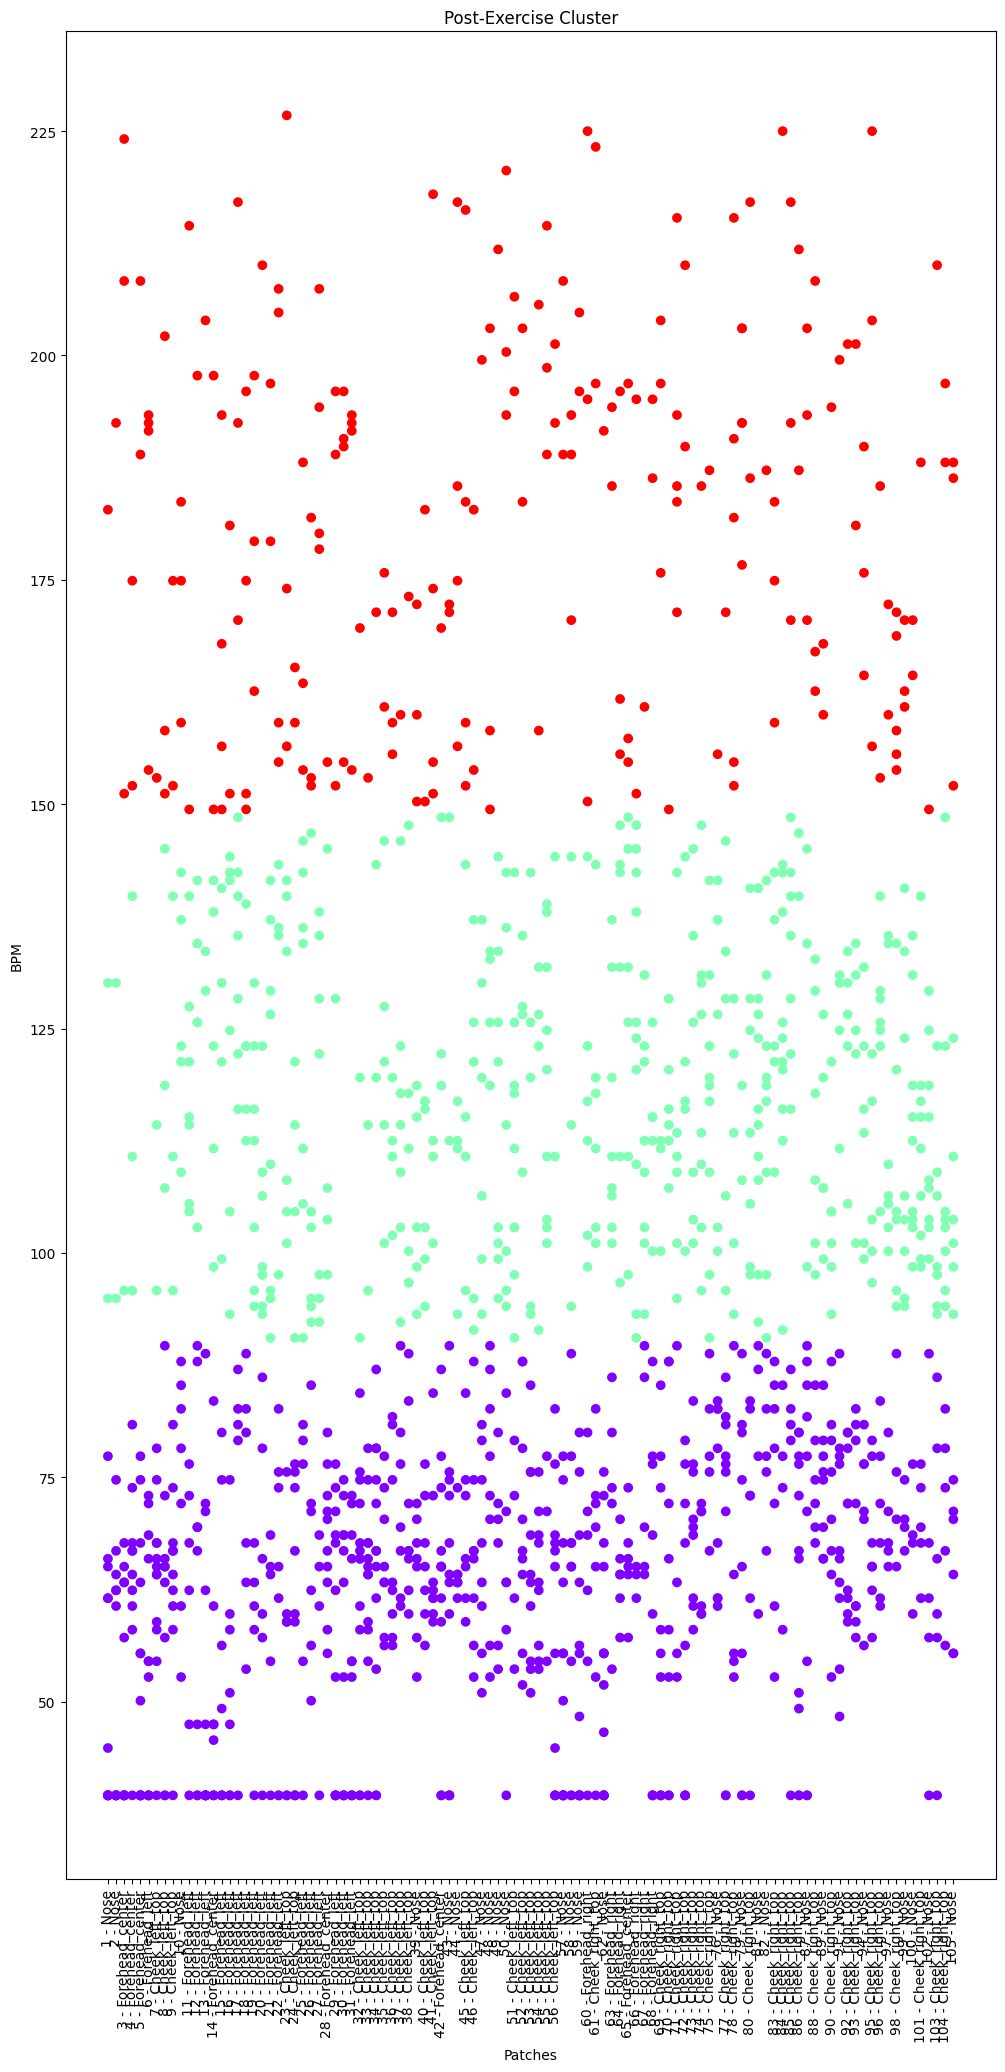

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the CSV files
file1 = pd.read_csv("/content/BPM_Data - BPM_Post-Exercise-1_Vijay.csv")
file2 = pd.read_csv("/content/BPM_Data - BPM_Post-Exercise-2_Vijay.csv")
file3 = pd.read_csv("/content/BPM_Data - BPM-Post-Exercise-3_Vijay.csv")
file4 = pd.read_csv("/content/BPM_Data - BPM-Post_Exercise_1_Rohith.csv")
file5 = pd.read_csv("/content/BPM_Data - BPM-Post_Exercise_2_Rohith.csv")
file6 = pd.read_csv("/content/BPM_Data - BPM-Post_Exercise_3_Rohith.csv")
file7 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_1_Sanjeev.csv")
file8 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_2_Sanjeev.csv")
file9 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_3_Sanjeev.csv")
file10 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_1_Vignesh.csv")
file11 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_2_Vignesh.csv")
file12 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_3_Vignesh.csv")
file13 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise-2_1_Vignesh.csv")
file14 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise-2_2_Vignesh.csv")
file15 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise-2_3_Vignesh.csv")

combined_data = pd.concat([file1, file2, file3,file4,file5,file6,file7,file8,file9,file10,file11,file12,file13,file14,file15], ignore_index=True)

# Specify the number of clusters
k = 3

# Initialize KMeans model
kmeans = KMeans(n_clusters=k, n_init=50, random_state=0)
cluster_labels = kmeans.fit_predict(combined_data[['BPM']])

# Add cluster labels to the dataframe
combined_data['Cluster'] = cluster_labels

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Find ranges for each cluster
cluster_ranges = []
for i, center in enumerate(cluster_centers):
    cluster_data = combined_data[combined_data['Cluster'] == i]
    min_value = cluster_data['BPM'].min()
    max_value = cluster_data['BPM'].max()
    cluster_ranges.append((min_value, max_value))

# Print cluster ranges and no of points in a cluster
for i, (min_val, max_val) in enumerate(cluster_ranges):
    cluster_data = combined_data[combined_data['Cluster'] == i]
    num_points = cluster_data.shape[0]
    print(f"Cluster {i+1} Range: {min_val:.2f} - {max_val:.2f} (Number of Points: {num_points})")

# Filter points between 70 and 85 BPM
# range_70_90 = combined_data[(combined_data['BPM'] >= 70) & (combined_data['BPM'] <= 85)]

# Filter points between 85 and 115 BPM
range_90_120 = combined_data[(combined_data['BPM'] > 106) & (combined_data['BPM'] <= 134)]

# Save points between 70 and 90 BPM to a CSV file
# range_70_90.to_csv('70-85_clst.csv', index=False)

# Save points between 90 and 120 BPM to a CSV file
range_90_120.to_csv('106-134_clst.csv', index=False)

# Visualize the clusters
plt.subplots_adjust(wspace=50.0)
plt.figure(figsize=(12, 24))
plt.scatter(combined_data['Patches'], combined_data['BPM'], c=cluster_labels, cmap='rainbow')
plt.xlabel('Patches')
plt.xticks(rotation=90, ha='center')
plt.ylabel('BPM')
plt.title('Post-Exercise Cluster')
plt.show()

# df_70_85 = pd.read_csv('70-85_clst.csv')
df_85_120 = pd.read_csv('106-134_clst.csv')

# Count the occurrences of each element in 'Patches'
# patch_counts_70_85 = df_70_85['Patches'].value_counts()
patch_counts_85_120 = df_85_120['Patches'].value_counts()

# Add 'count' column to each dataframe
# df_70_85['count'] = df_70_85['Patches'].map(patch_counts_70_85)
df_85_120['count'] = df_85_120['Patches'].map(patch_counts_85_120)

# Save modified dataframes to new CSV files
# df_70_85.to_csv('70-85_clst_count.csv', index=False)
df_85_120.to_csv('106-134_clst_count.csv', index=False)

# df_70_85_count = pd.read_csv('70-85_clst_count.csv')
df_85_120_count = pd.read_csv('106-134_clst_count.csv')

# Sort dataframes based on 'count' column in descending order
# sorted_df_70_85 = df_70_85_count.sort_values(by='count', ascending=False)
sorted_df_85_120 = df_85_120_count.sort_values(by='count', ascending=False)

# Save sorted dataframes to new CSV files
# sorted_df_70_85.to_csv('70-85_sorted.csv', index=False)
sorted_df_85_120.to_csv('106-134_sorted.csv', index=False)

Cluster 1 Range: 146.78 - 232.03 (Number of Points: 680)
Cluster 2 Range: 39.55 - 89.65 (Number of Points: 2580)
Cluster 3 Range: 90.53 - 145.90 (Number of Points: 1465)


<Figure size 640x480 with 0 Axes>

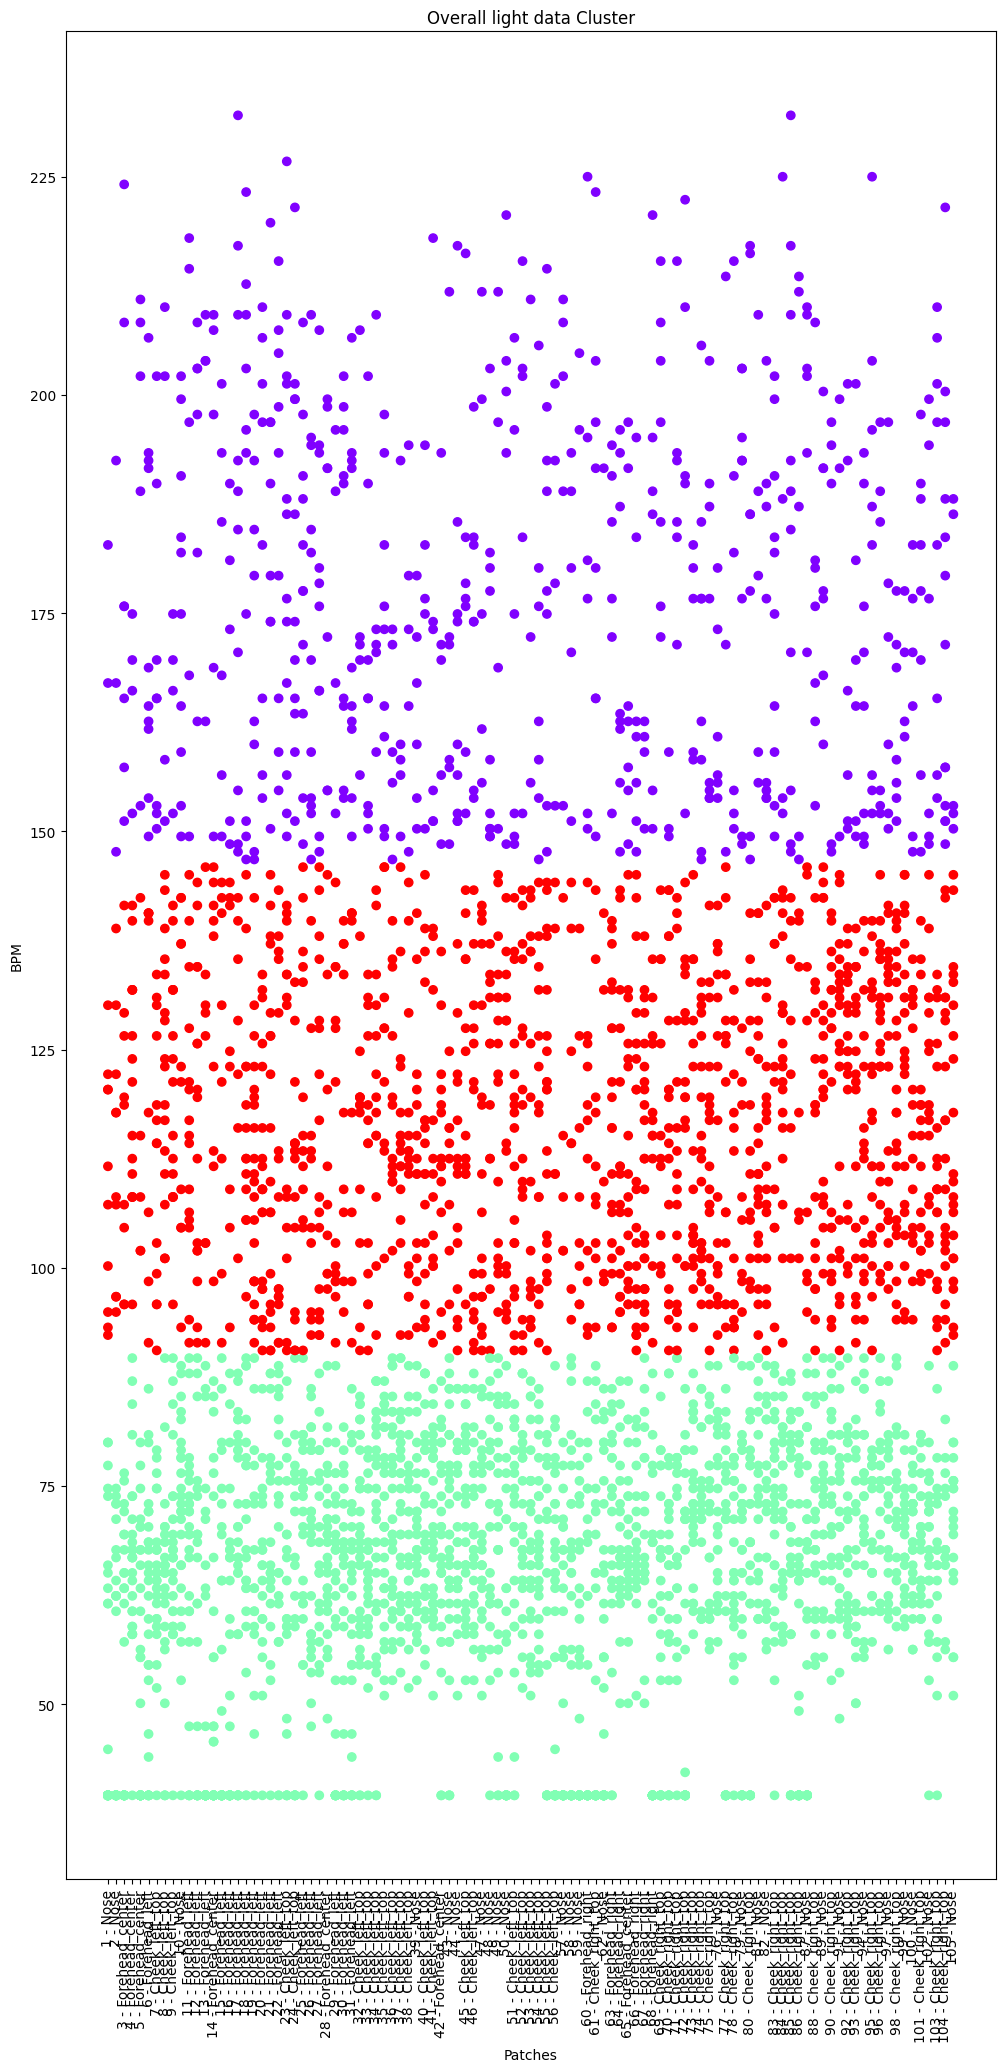

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the CSV files
file1 = pd.read_csv("/content/BPM_Data - Sheet1.csv")
file2 = pd.read_csv("/content/BPM_Data - BPM_Pre-Exercise-2_Vijay.csv")
file3 = pd.read_csv("/content/BPM_Data - BPM_Pre-Exercise-3_Vijay.csv")
file4 = pd.read_csv("/content/BPM_Data - BPM-Pre_Exercise_1_Rohith.csv")
file5 = pd.read_csv("/content/BPM_Data - BPM-Pre_Exercise_2_Rohith.csv")
file6 = pd.read_csv("/content/BPM_Data - BPM-Pre_Exercise_3_Rohith.csv")
file7 = pd.read_csv("/content/BPM_Data - BPM_Pre_Exercise_1_Elayaraja.csv")
file8 = pd.read_csv("/content/BPM_Data - BPM_Pre_Exercise_2_Elayaraja.csv")
file9 = pd.read_csv("/content/BPM_Data - BPM_Pre_Exercise_3_Elayaraja.csv")
file10 = pd.read_csv("/content/BPM_Data - BPM_Pre_Exercise_1_Sanjeev.csv")
file11 = pd.read_csv("/content/BPM_Data - BPM_Pre_Exercise_2_Sanjeev.csv")
file12 = pd.read_csv("/content/BPM_Data - BPM_Pre_Exercise_3_Sanjeev.csv")
file13 = pd.read_csv("/content/BPM_Data - BPM_Post-Exercise-1_Vijay.csv")
file14 = pd.read_csv("/content/BPM_Data - BPM_Post-Exercise-2_Vijay.csv")
file15 = pd.read_csv("/content/BPM_Data - BPM-Post-Exercise-3_Vijay.csv")
file16 = pd.read_csv("/content/BPM_Data - BPM-Post_Exercise_1_Rohith.csv")
file17 = pd.read_csv("/content/BPM_Data - BPM-Post_Exercise_2_Rohith.csv")
file18 = pd.read_csv("/content/BPM_Data - BPM-Post_Exercise_3_Rohith.csv")
file19 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_1_Sanjeev.csv")
file20 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_2_Sanjeev.csv")
file21 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_3_Sanjeev.csv")
file22 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_1_Elayaraja.csv")
file23 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_2_Elayaraja.csv")
file24 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_3_Elayaraja.csv")
file25 = pd.read_csv("/content/BPM_Data - BPM-Post-Exercise-2-1_Vijay.csv")
file26 = pd.read_csv("/content/BPM_Data - BPM-Post-Exercise-2-2_Vijay.csv")
file27 = pd.read_csv("/content/BPM_Data - BPM-Post-Exercise-2-3_Vijay.csv")
file28 = pd.read_csv("/content/BPM_Data - BPM-Post_Exercise-2_1_Rohith.csv")
file29 = pd.read_csv("/content/BPM_Data - BPM-Post_Exercise-2_2_Rohith.csv")
file30 = pd.read_csv("/content/BPM_Data - BPM-Post_Exercise-2_3_Rohith.csv")
file31 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_2_1_Elayaraja.csv")
file32 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_2_2_Elayaraja.csv")
file33 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_2_3_Elayaraja.csv")
file34 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_2_1_Sanjeev.csv")
file35 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_2_2_Sanjeev.csv")
file36 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_2_3_Sanjeev.csv")
file37 = pd.read_csv("/content/BPM_Data - BPM_Pre_Exercise_1_Vignesh.csv")
file38 = pd.read_csv("/content/BPM_Data - BPM_Pre_Exercise_2_Vignesh.csv")
file39 = pd.read_csv("/content/BPM_Data - BPM_Pre_Exercise_3_Vignesh.csv")
file40 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_1_Vignesh.csv")
file41 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_2_Vignesh.csv")
file42 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise_3_Vignesh.csv")
file43 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise-2_1_Vignesh.csv")
file44 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise-2_2_Vignesh.csv")
file45 = pd.read_csv("/content/BPM_Data - BPM_Post_Exercise-2_3_Vignesh.csv")

combined_data = pd.concat([file1, file2, file3,file4,file5,file6,file7,file8,file9,file10,file11,file12,file13, file14, file15, file16, file17, file18, file19, file20, file21, file22, file23, file24, file25, file26, file27, file28, file29, file30, file31, file32, file33, file34, file35, file36,file37, file38, file39, file40, file41, file42, file43, file44, file45], ignore_index=True)

# Specify the number of clusters
k = 3

# Initialize KMeans model
kmeans = KMeans(n_clusters=k, n_init=50, random_state=0)
cluster_labels = kmeans.fit_predict(combined_data[['BPM']])

# Add cluster labels to the dataframe
combined_data['Cluster'] = cluster_labels

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Find ranges for each cluster
cluster_ranges = []
for i, center in enumerate(cluster_centers):
    cluster_data = combined_data[combined_data['Cluster'] == i]
    min_value = cluster_data['BPM'].min()
    max_value = cluster_data['BPM'].max()
    cluster_ranges.append((min_value, max_value))

# Print cluster ranges and no of points in a cluster
for i, (min_val, max_val) in enumerate(cluster_ranges):
    cluster_data = combined_data[combined_data['Cluster'] == i]
    num_points = cluster_data.shape[0]
    print(f"Cluster {i+1} Range: {min_val:.2f} - {max_val:.2f} (Number of Points: {num_points})")

# Filter points between 70 and 85 BPM
# range_70_90 = combined_data[(combined_data['BPM'] >= 70) & (combined_data['BPM'] <= 85)]

# # Filter points between 85 and 115 BPM
# range_90_120 = combined_data[(combined_data['BPM'] > 100) & (combined_data['BPM'] <= 115)]

# # Save points between 70 and 90 BPM to a CSV file
# range_70_90.to_csv('70-85_clst.csv', index=False)

# # Save points between 90 and 120 BPM to a CSV file
# range_90_120.to_csv('100-115_clst.csv', index=False)

# Visualize the clusters
plt.subplots_adjust(wspace=50.0)
plt.figure(figsize=(12, 24))
plt.scatter(combined_data['Patches'], combined_data['BPM'], c=cluster_labels, cmap='rainbow')
plt.xlabel('Patches')
plt.xticks(rotation=90, ha='center')
plt.ylabel('BPM')
plt.title('Overall light data Cluster')
plt.show()

# df_70_85 = pd.read_csv('70-85_clst.csv')
# df_85_120 = pd.read_csv('100-115_clst.csv')

# # Count the occurrences of each element in 'Patches'
# patch_counts_70_85 = df_70_85['Patches'].value_counts()
# patch_counts_85_120 = df_85_120['Patches'].value_counts()

# # Add 'count' column to each dataframe
# df_70_85['count'] = df_70_85['Patches'].map(patch_counts_70_85)
# df_85_120['count'] = df_85_120['Patches'].map(patch_counts_85_120)

# # Save modified dataframes to new CSV files
# df_70_85.to_csv('70-85_clst_count.csv', index=False)
# df_85_120.to_csv('100-115_clst_count.csv', index=False)

# df_70_85_count = pd.read_csv('70-85_clst_count.csv')
# df_85_120_count = pd.read_csv('100-115_clst_count.csv')

# # Sort dataframes based on 'count' column in descending order
# sorted_df_70_85 = df_70_85_count.sort_values(by='count', ascending=False)
# sorted_df_85_120 = df_85_120_count.sort_values(by='count', ascending=False)

# # Save sorted dataframes to new CSV files
# sorted_df_70_85.to_csv('70-85_sorted.csv', index=False)
# sorted_df_85_120.to_csv('100-115_sorted.csv', index=False)

In [ ]:
data = [116, 111, 117, 118, 119, 100, 47, 126, 101, 123, 137, 177, 50, 36, 209, 129, 205, 147, 177, 215, 187, 207, 206, 203, 10, 151, 9, 8, 107, 336, 285, 55, 8, 338, 337, 336, 296, 285, 295, 282, 334, 293, 301, 251, 298, 333, 299, 297, 332, 284, 349, 348, 347, 346, 345, 447, 323, 280, 352, 330, 371, 358, 423, 426, 425, 427, 411, 376, 21, 71, 68, 54, 103, 104, 63, 70, 53, 52, 65, 107, 66, 108, 69, 67, 109, 105, 193, 417, 168, 188, 6, 412, 197, 174, 399, 456, 195, 236, 131, 51, 281, 360, 440, 4, 220, 219, 305, 157, 144, 145, 22, 23, 25, 154, 31, 160, 33, 46, 52, 53, 55, 56, 189, 190, 63, 65, 66, 70, 221, 222, 223, 225, 226, 228, 229, 230, 231, 232, 105, 233, 107, 243, 124, 204, 170, 140, 194, 201, 171, 175, 200, 418, 396, 369, 421, 431, 379, 424, 384, 385, 386, 259, 388, 261, 265, 398, 276, 282, 283, 285, 413, 293, 296, 300, 441, 442, 445, 446, 449, 451, 334, 463, 336, 464, 467, 339, 341, 342, 353, 381, 373, 249, 253, 255, 391, 393, 11, 269, 270, 271, 287, 164, 165, 37, 167, 40, 43, 181, 313, 314, 186, 57, 315, 61, 321, 73, 76, 335, 83, 85, 90, 106, 215, 138, 135, 210, 212, 57, 216, 207, 192, 435, 427, 416, 364, 394, 422, 287, 410, 434, 436]
# Create a dictionary to count occurrences of each element
element_count = {}
non_unique_elements = []

# Iterate through the list and count occurrences
for num in data:
    if num in element_count:
        element_count[num] += 1
        element_info[num]['indices'].append(idx)
    else:
        element_count[num] = 1

# Identify non-unique elements
for num, count in element_count.items():
    if count > 1:
        non_unique_elements.append(num)
        # print(num)
        # print(count)
#107 and 336 are repeated twice(3 occurences)
print("Non-unique elements:", non_unique_elements)
print(len(non_unique_elements))

177
2
215
2
207
2
8
2
107
3
336
3
285
3
55
2
296
2
282
2
334
2
293
2
427
2
63
2
70
2
53
2
52
2
65
2
66
2
105
2
287
2
57
2
Non-unique elements: [177, 215, 207, 8, 107, 336, 285, 55, 296, 282, 334, 293, 427, 63, 70, 53, 52, 65, 66, 105, 287, 57]
22


In [ ]:
data = [204, 170, 140, 194, 201, 171, 175, 200, 418, 396, 369, 421, 431, 379, 424, 391, 393, 11, 269, 270, 271, 287, 164, 165, 37, 167, 40, 43, 181, 313, 314, 186, 57, 315, 61, 321, 73, 76, 335, 83, 85, 90, 106, 215, 138, 135, 210, 212, 57, 216, 207, 192, 435, 427, 416, 364, 394, 422, 287, 410, 434, 436]
# Create a dictionary to count occurrences of each element along with their indices
element_info = {}
non_unique_elements = []

# Iterate through the list and count occurrences and track indices
for idx, num in enumerate(data):
    if num in element_info:
        element_info[num]['count'] += 1
        element_info[num]['indices'].append(idx)
    else:
        element_info[num] = {'count': 1, 'indices': [idx]}

# Identify non-unique elements
for num, info in element_info.items():
    if info['count'] > 1:
        non_unique_elements.append((num, info['indices']))

print("Non-unique elements with indices:")
# k=[]
for num, indices in non_unique_elements:
    print(f"Element: {num}, Count: {element_info[num]['count']}, Indices: {indices}")
    # print(indices)
    # k.append(indices)
# k.sort()
# print(k)
# print(len(non_unique_elements))
# print(data[18])
# print(non_unique_elements[19])

Non-unique elements with indices:
Element: 287, Count: 2, Indices: [21, 58]
Element: 57, Count: 2, Indices: [32, 48]


In [ ]:
data = [204, 170, 140, 194, 201, 171, 175, 200, 418, 396, 369, 421, 431, 379, 424, 391, 393, 11, 269, 270, 271, 287, 164, 165, 37, 167, 40, 43, 181, 313, 314, 186, 57, 315, 61, 321, 73, 76, 335, 83, 85, 90, 106, 215, 138, 135, 210, 212, 57, 216, 207, 192, 435, 427, 416, 364, 394, 422, 287, 410, 434, 436]
element_to_find = 57

indices = [index for index, value in enumerate(data) if value == element_to_find]
print(indices)
data.pop(58)
data.pop(48)
indices = [index for index, value in enumerate(data) if value == element_to_find]
print(indices)
print(len(data))
print(data)

[32, 48]
[32]
60
[204, 170, 140, 194, 201, 171, 175, 200, 418, 396, 369, 421, 431, 379, 424, 391, 393, 11, 269, 270, 271, 287, 164, 165, 37, 167, 40, 43, 181, 313, 314, 186, 57, 315, 61, 321, 73, 76, 335, 83, 85, 90, 106, 215, 138, 135, 210, 212, 216, 207, 192, 435, 427, 416, 364, 394, 422, 410, 434, 436]


In [ ]:
def are_elements_unique(lst):
    seen = set()
    for item in lst:
        if item in seen:
            return False
        seen.add(item)
    return True

# Example usage
d = [204, 170, 140, 194, 201, 171, 175, 200, 418, 396, 369, 421, 431, 379, 424, 391, 393, 11, 269, 270, 271, 287, 164, 165, 37, 167, 40, 43, 181, 313, 314, 186, 57, 315, 61, 321, 73, 76, 335, 83, 85, 90, 106, 215, 138, 135, 210, 212, 216, 207, 192, 435, 427, 416, 364, 394, 422, 410, 434, 436]
result = are_elements_unique(d)
print("Are elements unique?", result)

Are elements unique? True


2        3
6        7
8        9
9       10
13      14
18      19
20      21
24      25
26      27
39      40
54      55
56      57
64      65
76      77
78      79
85      86
86      87
94      95
97      98
98      99
99     100
101    102
103    104
105    106
108    109
114    115
116    117
126    127
130    131
136    137
144    145
154    155
156    157
160    161
164    165
Name: Rank, dtype: int64


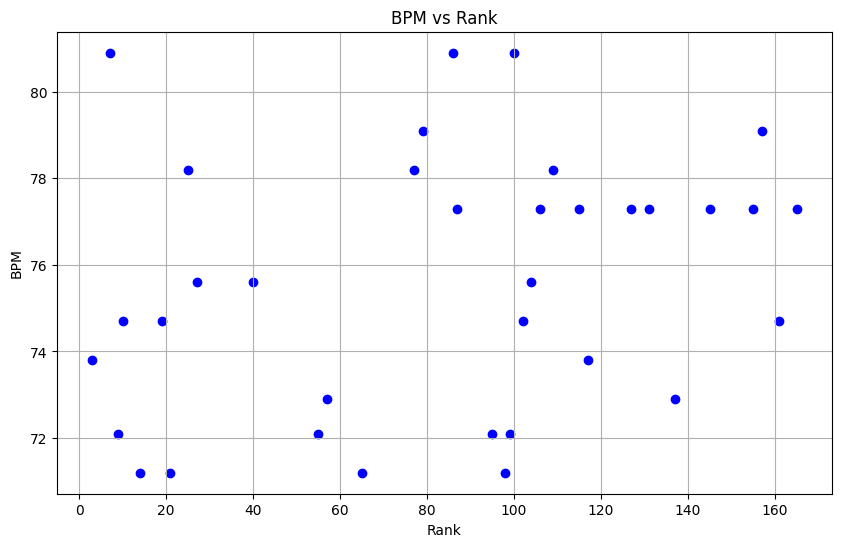

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace with your CSV file path
csv_file = '/content/BPM+Brightness_Data - Pre_Ex_1_Sanjeev.csv'
df = pd.read_csv(csv_file)

# Define the target BPM value
target_bpm = 76

# Filter rows based on BPM values within + or - 10 of the target value
filtered_df = df[(df['BPM_Pre'] >= target_bpm - 5) & (df['BPM_Pre'] <= target_bpm + 5)]

# Extract Rank and BPM columns from the filtered data
filtered_ranks = filtered_df['Rank']
filtered_bpm = filtered_df['BPM_Pre']
print(filtered_ranks)
# Plot BPM vs Rank
plt.figure(figsize=(10, 6))
plt.scatter(filtered_ranks, filtered_bpm, color='blue', marker='o')
plt.xlabel('BPM')
plt.ylabel('Rank')
plt.title(f'BPM vs Rank')
plt.grid(True)
plt.show()

In [ ]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory path where your CSV files are located
directory_path = '/content/'

# Use glob to find all CSV files in the directory
csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

# Define a list of target BPM values
target_bpms = [
    73, 103, 92, 84, 94, 85, 131, 93, 101, 76,
    113, 90, 114, 100, 106, 71, 115, 114, 95, 108,
    103, 116, 88, 106, 131, 109, 112, 131, 96, 90,
    82, 84, 111, 86, 73, 134, 100, 107, 89, 101,
    84, 140, 114, 107, 89, 85, 105, 81, 141, 89, 111, 143, 89
]


# Loop over each CSV file and target BPM
for csv_file in csv_files:
    # print(csv_file)
    # Load the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Sort the 'average_luminance' column in descending order
    sorted_df = df.sort_values(by='Avg_RL', ascending=False)

    # Calculate and plot the averages for different numbers of values
    num_values_list = [5, 10, 15, 20]
    def calculate_average(data_frame, num_values):
      values_subset = data_frame.head(num_values)
      average = values_subset['BPM'].mean()
      return average

    averages = []

    for num_values in num_values_list:
        average = calculate_average(sorted_df, num_values)
        averages.append(average)

    overall_average = df['BPM'].mean()

    # Plotting
    plt.plot(num_values_list, averages, marker='o', label='Averages')
    plt.axhline(y=overall_average, color='g', linestyle='-', label='Overall Average')
    plt.xlabel('Number of Patches')
    plt.ylabel('Average BPM')
    plt.title('Most illuminated Patch estimates')
    plt.yticks(range(50, 210, 10))
    plt.ylim(50, 200)

    for i, txt in enumerate(averages):
        plt.text(num_values_list[i], averages[i], f'{averages[i]:.2f}', ha='center', va='bottom')

    target_bpm = target_bpms[csv_files.index(csv_file)]  # Get the target BPM for the current file
    plt.axhline(y=target_bpm, color='r', linestyle='--', label='GT BPM')
    plt.text(10.5, target_bpm+5, f'GT BPM: {target_bpm}', color='r', ha='left', va='top')
    plt.text(10.5, overall_average-5, f'Overall Avg: {overall_average:.2f}', color='g', ha='left', va='bottom')

    plt.legend()
    plt.grid(True)

    # Extract the filename without the extension
    filename = os.path.splitext(os.path.basename(csv_file))[0]

    # Save the plot with the filename
    save_path = f'{filename}.png'
    plt.savefig(save_path)
    plt.clf()

/content/BPM_Brightness-FaceTop - Pre-Ex-3-Vijay.csv
/content/BPM_Brightness-FaceTop - Pre-Ex-3-Vignesh.csv
/content/BPM_Brightness-FaceTop - Post-Ex_2-1-Vijay.csv
/content/BPM_Brightness-FaceTop - Post-Ex_2-1-Elaya.csv
/content/BPM_Brightness-FaceTop - Post-Ex_2-1-Sanjeev.csv
/content/BPM_Brightness-FaceTop - Pre-Ex-2-Sanjeev.csv
/content/BPM_Brightness-FaceTop - Post-Ex_2-3-Rakhul.csv
/content/BPM_Brightness-FaceTop - Post-Ex_2-3-Vijay.csv
/content/BPM_Brightness-FaceTop - Post-Ex_2-1-Rohith.csv
/content/BPM_Brightness-FaceTop - Pre-Ex-1-Sanjeev.csv
/content/BPM_Brightness-FaceTop - Post-Ex-2-Vijay.csv
/content/BPM_Brightness-FaceTop - Post-Ex_2-2-Sanjeev.csv
/content/BPM_Brightness-FaceTop - Post-Ex-1-Vijay.csv
/content/BPM_Brightness-FaceTop - Post-Ex-3-Sanjeev.csv
/content/BPM_Brightness-FaceTop - Post-Ex-3-Vijay.csv
/content/BPM_Brightness-FaceTop - Pre-Ex-1-Vijay.csv
/content/BPM_Brightness-FaceTop - Post-Ex_2-2-Vignesh.csv
/content/BPM_Brightness-FaceTop - Post-Ex-1-Rohith.csv


<Figure size 640x480 with 0 Axes>

In [ ]:
import os
import glob

# Define the directory path where your PNG files are located (replace with your folder path)
directory_path = '/content/'

# Use glob to find all PNG files in the directory
png_files = glob.glob(os.path.join(directory_path, '*.csv'))
# print(len(png_files))
# Loop through the PNG files and delete them
for png_file in png_files:
    os.remove(png_file)

In [ ]:
import os
import glob

# Define the directory path where your PNG files are located (replace with your folder path)
directory_path = '/content/'

# Use glob to find all PNG files in the directory
csv_files = glob.glob(os.path.join(directory_path, '*.csv'))
print(len(csv_files))
print(csv_files)
# Loop through the PNG files and delete them
# for png_file in png_files:
#     os.remove(png_file)

53
['/content/BPM_Brightness-FaceTop - Pre-Ex-3-Vijay.csv', '/content/BPM_Brightness-FaceTop - Pre-Ex-3-Vignesh.csv', '/content/BPM_Brightness-FaceTop - Post-Ex_2-1-Vijay.csv', '/content/BPM_Brightness-FaceTop - Post-Ex_2-1-Elaya.csv', '/content/BPM_Brightness-FaceTop - Post-Ex_2-1-Sanjeev.csv', '/content/BPM_Brightness-FaceTop - Pre-Ex-2-Sanjeev.csv', '/content/BPM_Brightness-FaceTop - Post-Ex_2-3-Rakhul.csv', '/content/BPM_Brightness-FaceTop - Post-Ex_2-3-Vijay.csv', '/content/BPM_Brightness-FaceTop - Post-Ex_2-1-Rohith.csv', '/content/BPM_Brightness-FaceTop - Pre-Ex-1-Sanjeev.csv', '/content/BPM_Brightness-FaceTop - Post-Ex-2-Vijay.csv', '/content/BPM_Brightness-FaceTop - Post-Ex_2-2-Sanjeev.csv', '/content/BPM_Brightness-FaceTop - Post-Ex-1-Vijay.csv', '/content/BPM_Brightness-FaceTop - Post-Ex-3-Sanjeev.csv', '/content/BPM_Brightness-FaceTop - Post-Ex-3-Vijay.csv', '/content/BPM_Brightness-FaceTop - Pre-Ex-1-Vijay.csv', '/content/BPM_Brightness-FaceTop - Post-Ex_2-2-Vignesh.csv', 

In [ ]:
import glob
import pandas as pd

# Define the directory path where your CSV files are located
directory_path = '/content/'

# Use glob to find all CSV files in the directory
csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

# Create a DataFrame from the list of CSV files
csv_df = pd.DataFrame({'CSV Files': csv_files})

# Save the DataFrame to a CSV file
csv_df.to_csv('csv_file_list.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a DataFrame
csv_file = '/content/BPM+Brightness data_BottomFace - Post-Ex-2-3-Rakhul.csv'
df = pd.read_csv(csv_file)

# Sort the 'average_luminance' column in descending order
sorted_df = df.sort_values(by='Avg_RL', ascending=False)

# Calculate the average of the first n values
def calculate_average(data_frame, num_values):
    values_subset = data_frame.head(num_values)
    average = values_subset['BPM'].mean()
    return average

# Calculate and plot the averages for different numbers of values
num_values_list = [5, 10, 15, 20]
target_bpm = 131  # Replace with your target BPM value

averages = []
for num_values in num_values_list:
    average = calculate_average(sorted_df, num_values)
    averages.append(average)
    # print(f'Average of the first {num_values} values: {average}')
overall_average = df['BPM'].mean()
# print(averages)
# print(overall_average)
# Calculate percentage error for averages
k5=[]
k10=[]
k15=[]
k20=[]
kov=[]
percentage_errors = [abs((average - target_bpm)) / target_bpm * 100 for average in averages]
k5.append(round(percentage_errors[0],2))
k10.append(round(percentage_errors[1],2))
k15.append(round(percentage_errors[2],2))
k20.append(round(percentage_errors[3],2))
# Calculate percentage error for overall_average
overall_percentage_error = abs((overall_average - target_bpm)) / target_bpm * 100
kov.append(round(overall_percentage_error,2))
# Print percentage errors for averages and overall_average
for i, num_values in enumerate(num_values_list):
    print(f'For {num_values} values: Percentage Error = {percentage_errors[i]:.2f}%')

print(f'Overall Average: Percentage Error = {overall_percentage_error:.2f}%')
print(k5,k10,k15,k20,kov)

For 5 values: Percentage Error = 43.11%
For 10 values: Percentage Error = 39.22%
For 15 values: Percentage Error = 41.19%
For 20 values: Percentage Error = 37.47%
Overall Average: Percentage Error = 28.21%
[43.11] [39.22] [41.19] [37.47] [28.21]


In [ ]:
import os
import csv

# Get the path to your Colab content folder
content_folder = '/content'

# List all files in the content folder
all_files = os.listdir(content_folder)

# Filter CSV files
csv_files = [file for file in all_files if file.endswith('.csv')]

# Specify the CSV file names to be excluded
exclude_files = [
    "BPM+Brightness data_TopFace - Pre-Ex-3-Vijay.csv",
    "BPM+Brightness data_TopFace - Pre-Ex-1-Vijay (1).csv",
    "BPM+Brightness data_TopFace - Pre-Ex-1-Vijay.csv",
    "BPM+Brightness data_TopFace - Post-Ex-2-1-Vijay.csv",
    "BPM+Brightness data_TopFace - Post-Ex-2-2-Vijay.csv",
    "BPM+Brightness data_TopFace - Post-Ex-3-Vijay.csv",
    "BPM+Brightness data_TopFace - Post-Ex-2-Vijay.csv",
    "BPM+Brightness data_TopFace - Pre-Ex-3-Vijay (1).csv",
    "BPM+Brightness data_TopFace - Pre-Ex-2-Vijay.csv",
    "BPM+Brightness data_TopFace - Post-Ex-1-Vijay.csv",
    "BPM+Brightness data_TopFace_1 - Pre-Ex-2-Rohith.csv",
    "BPM+Brightness data_TopFace_1 - Pre-Ex-2-Rohith (1).csv",
    "BPM+Brightness data_TopFace_1 - Pre-Ex-1-Vignesh.csv",
    "BPM+Brightness data_TopFace_1 - Pre-Ex-1-Vijay.csv"
]

# Remove excluded files from csv_files
csv_files = [file for file in csv_files if file not in exclude_files]

# Specify the CSV file name to write the list
csv_file_name = 'filtered_csv_file_list.csv'

# Write CSV files list to the CSV file
with open(csv_file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['CSV Files'])
    writer.writerows([[file] for file in csv_files])

print(f'Filtered CSV Files list has been written to {csv_file_name}')

Filtered CSV Files list has been written to filtered_csv_file_list.csv


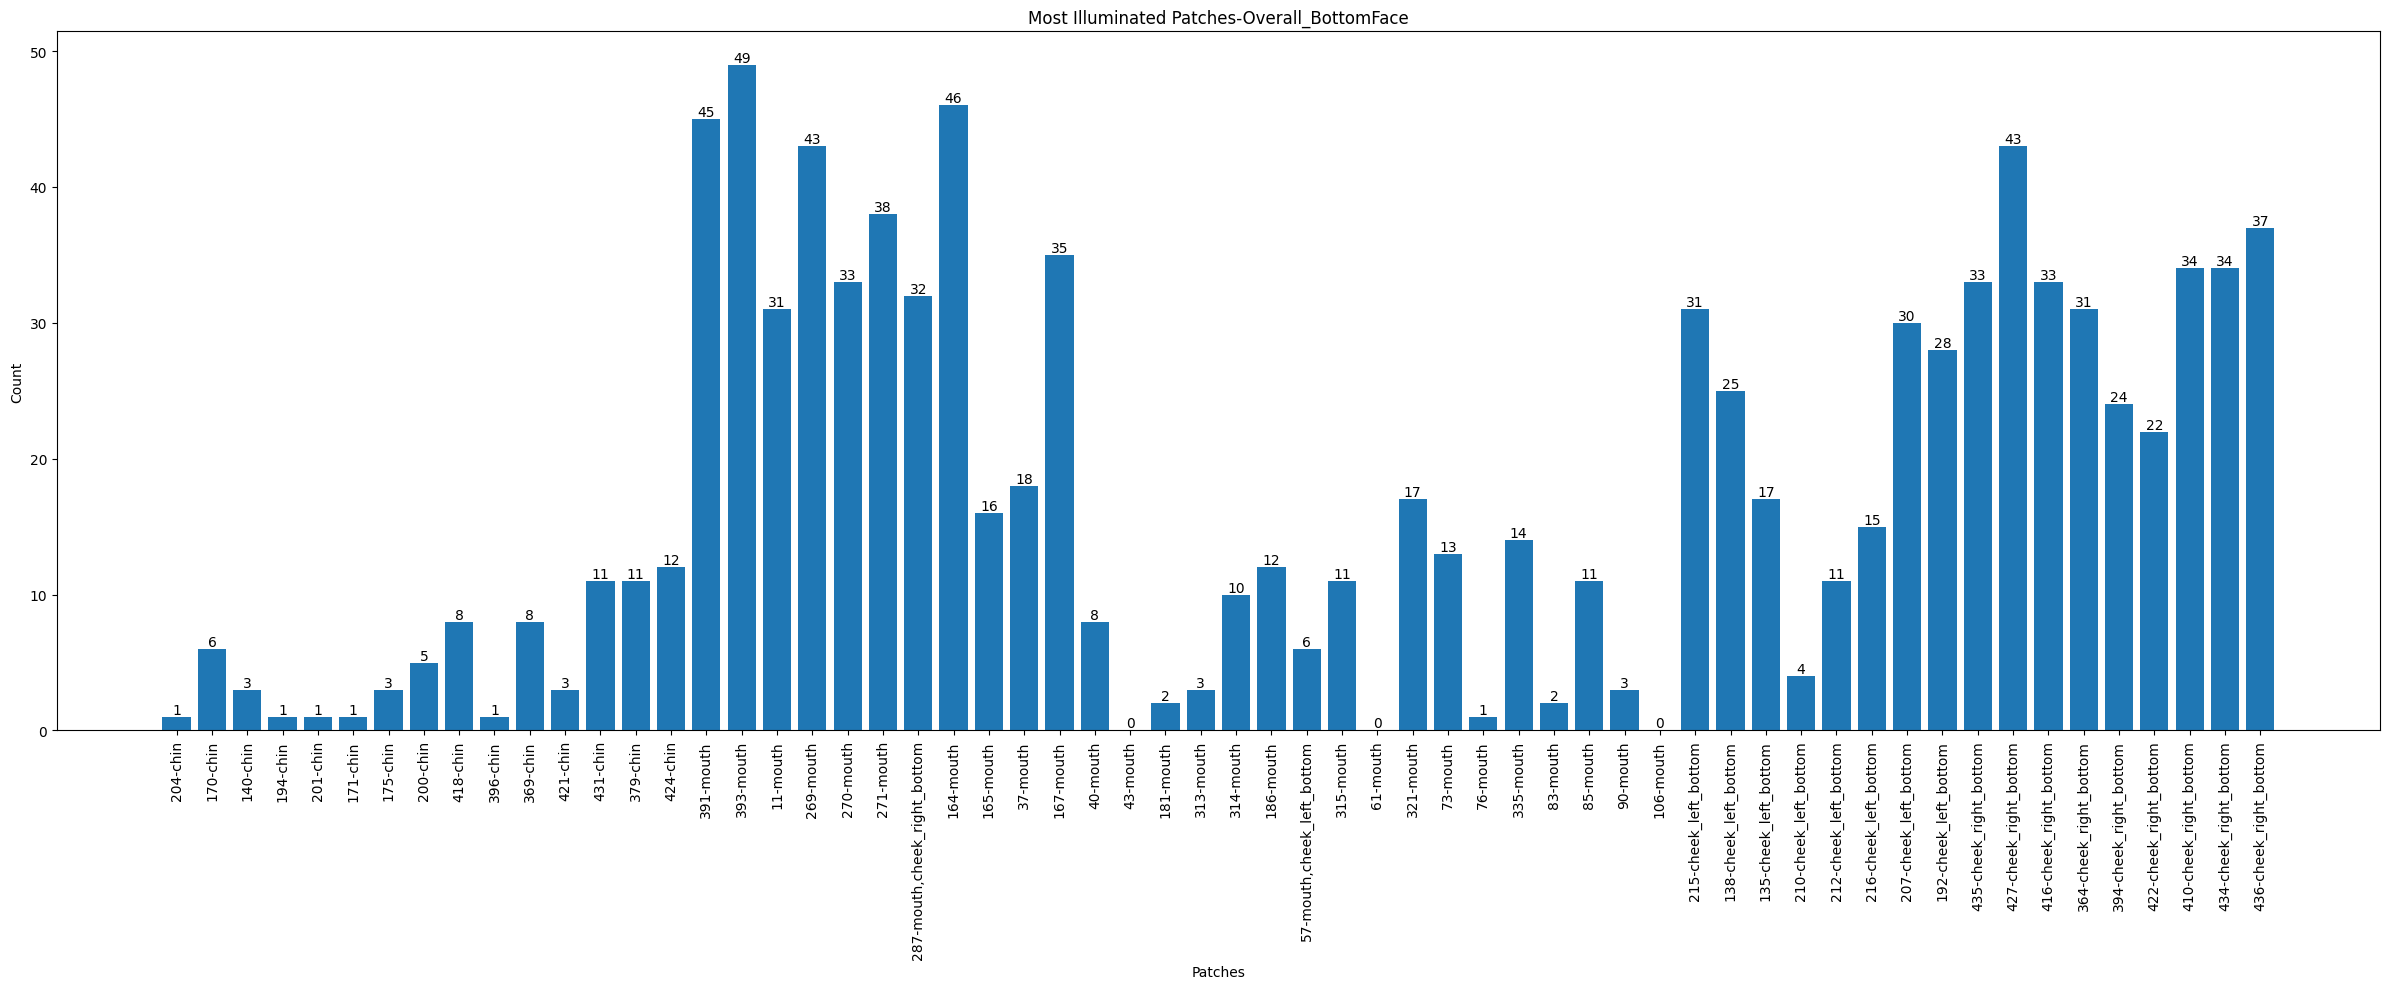

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
csv_file_path = '/content/Histogram_Data_2 - Brightness_BottomFace (3).csv'
df = pd.read_csv(csv_file_path)

# List of specified values
data = ['204-chin', '170-chin', '140-chin', '194-chin', '201-chin', '171-chin', '175-chin', '200-chin', '418-chin', '396-chin', '369-chin', '421-chin', '431-chin', '379-chin', '424-chin', '391-mouth', '393-mouth', '11-mouth', '269-mouth', '270-mouth', '271-mouth', '287-mouth,cheek_right_bottom', '164-mouth', '165-mouth', '37-mouth', '167-mouth', '40-mouth', '43-mouth', '181-mouth', '313-mouth', '314-mouth', '186-mouth', '57-mouth,cheek_left_bottom', '315-mouth', '61-mouth', '321-mouth', '73-mouth', '76-mouth', '335-mouth', '83-mouth', '85-mouth', '90-mouth', '106-mouth', '215-cheek_left_bottom', '138-cheek_left_bottom', '135-cheek_left_bottom', '210-cheek_left_bottom', '212-cheek_left_bottom', '216-cheek_left_bottom', '207-cheek_left_bottom', '192-cheek_left_bottom', '435-cheek_right_bottom', '427-cheek_right_bottom', '416-cheek_right_bottom', '364-cheek_right_bottom', '394-cheek_right_bottom', '422-cheek_right_bottom', '410-cheek_right_bottom', '434-cheek_right_bottom', '436-cheek_right_bottom']
df = df.astype(str)

# Flatten the DataFrame and filter values
all_values = df.values.flatten()
filtered_values = [value for value in all_values if value in data]

# Count occurrences of specified values
value_counts = pd.Series(filtered_values).value_counts()
custom_order = data
value_counts = value_counts.reindex(custom_order)
value_counts = value_counts.fillna(0)
# Sort the index in ascending order based on the numbers preceding them
# sorted_index = sorted(value_counts.index, key=lambda x: int(x.split(' - ')[0]))

# Create a Series with 0 count for missing elements
missing_elements = [element for element in data if element not in value_counts.index]
missing_counts = pd.Series(0, index=missing_elements)

# Concatenate value_counts and missing_counts
final_value_counts = pd.concat([value_counts, missing_counts])
# print(len(final_value_counts))
# print(len(final_value_counts.index))
# Ensure index order is correct
# sorted_index_2 = sorted(final_value_counts.index, key=lambda x: int(x.split(' - ')[0]))
# reordered_values = final_value_counts[sorted_index_2].values
# Increase figure height for more vertical space

plt.figure(figsize=(24, 10))

# Plot a histogram with sorted index
bars = plt.bar(final_value_counts.index, final_value_counts, width=0.8, align='center')
plt.xlabel('Patches')
plt.ylabel('Count')
plt.title('Most Illuminated Patches-Overall_BottomFace')
plt.xticks(rotation=90, ha='center')

# Add counts on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', color='black')

# Display the histogram
plt.tight_layout()
plt.show()